#### === Install & Import dependencies ===

In [48]:
import sys, subprocess, warnings

# --- Install required libraries ---
subprocess.check_call([
    sys.executable, "-m", "pip", "install", "-U",
    "numpy>=2.0.0", "scipy>=1.14", "pandas>=2.2",
    "phik>=0.12.4", "ydata-profiling>=4.7",
    "matplotlib>=3.8", "seaborn>=0.13"
])

# --- Check Python and library versions ---
print("\n🔍 Python version:", sys.version.split()[0])

import numpy as np, pandas as pd, matplotlib, seaborn as sns
import phik, ydata_profiling

print("NumPy:", np.__version__)
print("Pandas:", pd.__version__)
print("Matplotlib:", matplotlib.__version__)
print("Seaborn:", sns.__version__)
print("phik:", phik.__version__)
print("ydata-profiling:", ydata_profiling.__version__)

# --- Import modules and basic settings ---
import matplotlib.pyplot as plt
import pickle
warnings.filterwarnings("ignore")
%matplotlib inline



🔍 Python version: 3.11.9
NumPy: 2.1.3
Pandas: 2.3.3
Matplotlib: 3.10.0
Seaborn: 0.13.2
phik: 0.12.5
ydata-profiling: v4.17.0


### Load data 

In [49]:
# --- Loading the pre-cleaned file and creating a working copy for initial EDA ---

import pandas as pd
import shutil
from pathlib import Path

# Source file (already cleaned, with preserved dtypes)
source = Path("data/interim/flat_file.pkl")

# New working files for advanced EDA
eda_copy_pkl = Path("data/interim/EDA.pkl")
eda_copy_csv = Path("data/interim/EDA.csv")
eda_copy_pkl.parent.mkdir(parents=True, exist_ok=True)

# Create a physical copy to preserve the original file
shutil.copy2(source, eda_copy_pkl)

# Load into memory as df
df = pd.read_pickle(eda_copy_pkl)

# Save also as CSV (flat version)
df.to_csv(eda_copy_csv, index=False, encoding="utf-8-sig")

print(f"New EDA working file loaded: {eda_copy_pkl.resolve()}")
print(f"Shape: {df.shape}")
print(df.info())


New EDA working file loaded: C:\Users\zoars\Desktop\Data Science\machine learning\ML_PROJECT\360 project\my_ml_project\data\interim\EDA.pkl
Shape: (21981, 420)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21981 entries, 0 to 21980
Columns: 420 entries, ref_id_360_m1 to mother_birth_region_m1
dtypes: bool(13), category(373), datetime64[ns](6), float64(8), int64(20)
memory usage: 14.3 MB
None


## DATA PROTOCOL
### Reporting types Missing, min, max- Exporting results to the protocol


In [3]:
with pd.ExcelWriter("summary_flat_file.xlsx", engine="openpyxl") as xw:
    # Data Types
    df.dtypes.astype(str).rename("dtype").to_excel(xw, sheet_name="data_type")
    # Maximum valaues
    df.max(numeric_only=True).to_excel(xw, sheet_name="max_numeric")
    # Minimum Values
    df.min(numeric_only=True).to_excel(xw, sheet_name="min_numeric")
    # Missing Values
    df.isnull().sum().rename("missing").to_excel(xw, sheet_name="missing")
    # exporting results to the protocol
    df.nunique().rename("unique").to_excel(xw, sheet_name="unique")

In [4]:
!pip install openpyxl
%pip install -U openpyxl


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\zoars\Desktop\Data Science\machine learning\ML_PROJECT\360 project\.venv311\Scripts\python.exe -m pip install --upgrade pip


In [5]:
import openpyxl, pandas as pd
print("openpyxl:", openpyxl.__version__)

with pd.ExcelWriter("summary_flat_file.xlsx", engine="openpyxl") as xw:
    df.dtypes.astype(str).rename("dtype").to_excel(xw, sheet_name="data_type")


openpyxl: 3.1.5


In [6]:
import sys, os, openpyxl, pandas as pd

print("Python:", sys.version)
print("Interpreter:", sys.executable)
print("openpyxl:", openpyxl.__version__)
print("pandas:", pd.__version__)
print("CWD:", os.getcwd())


Python: 3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]
Interpreter: C:\Users\zoars\Desktop\Data Science\machine learning\ML_PROJECT\360 project\.venv311\Scripts\python.exe
openpyxl: 3.1.5
pandas: 2.3.3
CWD: C:\Users\zoars\Desktop\Data Science\machine learning\ML_PROJECT\360 project\my_ml_project


In [7]:
import sys
print("Python:", sys.version)
print("Interpreter:", sys.executable)

!{sys.executable} -m pip install -U openpyxl

import openpyxl
print("openpyxl:", openpyxl.__version__)


Python: 3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]
Interpreter: C:\Users\zoars\Desktop\Data Science\machine learning\ML_PROJECT\360 project\.venv311\Scripts\python.exe
openpyxl: 3.1.5


'C:\Users\zoars\Desktop\Data' is not recognized as an internal or external command,
operable program or batch file.


### QUICK PER-FILE REPORTS 

בחלק זה נעשה ניתוח תיאורי ראשוני על הערכים המילוליים המקוריים בלבד — לפני המרתם למשתנים מספריים לצורך ביצוע ניתוחים

In [8]:
def quick_data_report(df, title="Report"):
    print(f"\n=== {title} ===")
    
    # Shape
    print("Shape:", df.shape)
    
    # Info: non-null counts and dtypes
    print("\n-- Info --")
    df.info()
    
    # Dtypes summary
    print("\n-- Dtypes summary --")
    print(df.dtypes.value_counts())
    
    # Unique counts
    print("\n-- Unique values per column (top 10) --")
    nunique = df.nunique(dropna=False).sort_values(ascending=False)
    print(nunique.head(10))
    
    # Missing values
    na = df.isna().sum()
    na = na[na > 0].sort_values(ascending=False)
    print("\n-- Missing (top 10) --")
    print(na.head(10))
    
    # Duplicates
    print("\n-- Duplicated rows --", df.duplicated().sum())
    
    # Numeric stats
    print("\n-- Numeric describe (head) --")
    print(df.describe(include=[np.number]).T.head(8))
    
    # Categorical stats
    print("\n-- Categorical describe (head) --")
    print(df.describe(include=['object','category']).T.head(8))
    
quick_data_report(df)


=== Report ===
Shape: (21981, 421)

-- Info --
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21981 entries, 0 to 21980
Columns: 421 entries, ref_id_360_m1 to mother_birth_region_m1
dtypes: bool(13), category(374), datetime64[ns](6), float64(8), int64(20)
memory usage: 14.3 MB

-- Dtypes summary --
category    112
category     56
category     48
category     28
category     20
           ... 
category      1
category      1
category      1
category      1
category      1
Name: count, Length: 62, dtype: int64

-- Unique values per column (top 10) --
_row_order_m1         21981
_row_order_m2         21981
ref_id_360_m1         21956
ref_id_360_m2         21938
id_number             21783
form_dt_m1            21224
form_dt_m2            20570
form_date_m1          16239
form_date_m2          13380
strength_domain_m1     3159
dtype: int64

-- Missing (top 10) --
st21_supportive_community_networks_m2           21981
st20_family_flexibility_m2                      21981
alt_identifier_m

### == Data Utilities & Change Tracking Tools ==

In [50]:
# Snapshot before modifications and helper function for before–after documentation

# === Before–After Data Snapshot Functions ===
import pandas as pd

#  Function: capture current dataset structure (columns, row/column count)
def snapshot_cols(df: pd.DataFrame):
    """Snapshot of column names and overall dataset shape."""
    return set(df.columns), df.shape[0], df.shape[1]

#  Function: capture dtypes and count how many variables of each type exist
def snapshot_dtypes(df: pd.DataFrame):
    """Snapshot of data types and a summary table of dtype counts."""
    dt = df.dtypes.astype(str)
    dt_counts = dt.value_counts().to_frame("count")
    return dt, dt_counts

#  Function: print before–after report including shape, added/removed columns, and optional dtype changes
def report_changes(step_name: str,
                   before_cols: set, after_cols: set,
                   rows_before: int, rows_after: int,
                   before_dtypes: pd.Series | None = None,
                   after_dtypes: pd.Series | None = None,
                   before_index: set | None = None,
                   after_index: set | None = None,
                   print_now: bool = True):
    """Basic change report: dataset shape differences, columns added/removed, and optional dtype changes."""
    
    added_cols   = sorted(list(after_cols - before_cols))
    removed_cols = sorted(list(before_cols - after_cols))

    msg = [
        f"\n=== {step_name} ===",
        f"Shape before: ({rows_before:,}, {len(before_cols)}) | after: ({rows_after:,}, {len(after_cols)})",
        f"Δ rows: {rows_after - rows_before:+} | Δ columns: {len(after_cols) - len(before_cols):+}",
        f"➕ Added {len(added_cols)} columns: {added_cols if added_cols else '---'}",
        f"➖ Removed {len(removed_cols)} columns: {removed_cols if removed_cols else '---'}",
    ]

    # Count dtype changes (summary only)
    if (before_dtypes is not None) and (after_dtypes is not None):
        allc = sorted(list(before_cols | after_cols))
        bd = before_dtypes.reindex(allc)
        ad = after_dtypes.reindex(allc)
        dtype_changes = (bd != ad).sum()
        msg.append(f"🔄 Dtype changes: {int(dtype_changes)}")

    if print_now:
        print("\n".join(msg))


In [10]:
# Snapshot
before_cols, rows_before, cols_before = snapshot_cols(df)


# descriptive statistics

### Automated reports

In [11]:
# ===============================================================
# ydata-profiling: Comparison report on the flat file "as is" (no column drops)
# Includes universal columns (without _m1/_m2 suffixes)
# ===============================================================

from ydata_profiling import ProfileReport
from ydata_profiling.config import Settings
import pandas as pd, numpy as np, os
from pathlib import Path
from IPython.display import IFrame, display

os.makedirs("reports", exist_ok=True)

# --- Step 1: Identify columns by suffix + universal columns (without suffix) ---
m1_cols = [c for c in df.columns if str(c).endswith("_m1")]
m2_cols = [c for c in df.columns if str(c).endswith("_m2")]
bases = sorted({c[:-3] for c in m1_cols} & {c[:-3] for c in m2_cols})   # only pairs present in both sides
universal_cols = [c for c in df.columns if not (c.endswith("_m1") or c.endswith("_m2"))]

# --- Step 2: Build M1/M2 copies (df remains unchanged) ---
m1 = df[[f"{b}_m1" for b in bases]].copy(); m1.columns = bases
m2 = df[[f"{b}_m2" for b in bases]].copy(); m2.columns = bases

# Add universal columns to both sides (for display purposes)
for c in universal_cols:
    m1[c] = df[c]
    m2[c] = df[c]

# --- Step 3: Minimal type alignment to avoid {'Numeric', 'Unsupported'} errors ---
# Rule: never drop columns. If one side is fully empty → treat both as text; otherwise try numeric coercion.
for c in m1.columns:
    s1, s2 = m1[c], m2[c]

    # If one side is completely empty → treat both as string
    if (s1.notna().sum() == 0) ^ (s2.notna().sum() == 0):
        m1[c] = s1.astype("string").fillna("")
        m2[c] = s2.astype("string").fillna("")
        continue

    # If both sides have data, try converting to numeric when reasonable
    s1n = pd.to_numeric(s1, errors="coerce")
    s2n = pd.to_numeric(s2, errors="coerce")
    if (s1n.notna().mean() >= 0.8) or (s2n.notna().mean() >= 0.8):
        m1[c] = s1n.replace([np.inf, -np.inf], np.nan)
        m2[c] = s2n.replace([np.inf, -np.inf], np.nan)
        continue

    # Otherwise, leave as-is (categorical/text/date)

# --- Step 4: Generate profiling reports and comparison (no progress bar for widget-free mode) ---
cfg = Settings(progress_bar=False)
profile_m1 = ProfileReport(m1, title="Measurement 1 (M1) — raw view", explorative=True, config=cfg)
profile_m2 = ProfileReport(m2, title="Measurement 2 (M2) — raw view", explorative=True, config=cfg)
comparison = profile_m1.compare(profile_m2)

# --- Step 5: Save and display directly inside the notebook ---
out = Path("reports/ydata_compare_M1_M2.html")
comparison.to_file(out)

print(f"✅ Report successfully saved: {out.resolve()}")

# Inline display (opens directly within the notebook)
display(IFrame(src=out.as_posix(), width="100%", height="800px"))


100%|██████████| 209/209 [00:01<00:00, 106.70it/s]


✅ Report successfully saved: C:\Users\zoars\Desktop\Data Science\machine learning\ML_PROJECT\360 project\my_ml_project\reports\ydata_compare_M1_M2.html


In [12]:
import os, webbrowser
from pathlib import Path

out = Path(r"C:\Users\zoars\Desktop\Data Science\machine learning\ML_PROJECT\360 project\my_ml_project\reports\ydata_compare_M1_M2.html")

# Opens in a new browser tab by default (Windows)
if out.exists():
    webbrowser.open(out.as_uri(), new=2)
    print(f"✅ הדוח נפתח בדפדפן החיצוני:\n{out}")
else:
    print("⚠️ הקובץ לא נמצא:", out)

✅ הדוח נפתח בדפדפן החיצוני:
C:\Users\zoars\Desktop\Data Science\machine learning\ML_PROJECT\360 project\my_ml_project\reports\ydata_compare_M1_M2.html


# EDA - Explenatory Data Analysis

## Descriptive Statistics

In [13]:
# Displaying distributions for the first 30 columns

import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 2000)
 
df.iloc[:, :30].describe()


,ref_id_360_m1,form_date_m1,yeshuv_code,institution_code_m1,program_code_m1,alt_identifier_m1,birth_year_m1
count,2.198100e+04,16288,21981.000000,1.0,2.198100e+04,0.0,21981.000000
mean,1.172772e+06,2024-01-05 06:19:17.600564736,4782.558255,218404.0,5.728439e+07,NaN,2015.644648
min,1.146900e+06,2023-09-13 10:38:41,100.000000,218404.0,1.041050e+05,NaN,1997.000000
25%,1.159818e+06,2023-12-14 09:51:24,2300.000000,218404.0,2.210267e+06,NaN,2012.000000
50%,1.170092e+06,2023-12-25 14:44:22,4400.000000,218404.0,2.230029e+06,NaN,2017.000000
75%,1.182546e+06,2024-01-18 19:49:32.750000128,8170.000000,218404.0,2.290303e+06,NaN,2019.000000
max,1.244602e+06,2024-09-23 13:00:12,9999.000000,218404.0,9.331011e+08,NaN,2024.000000
std,1.775094e+04,NaN,2994.085249,NaN,1.828180e+08,NaN,4.427792


In [14]:
df.iloc[:,30:60].describe()

,num_children_u18_m1
count,21098.000000
mean,3.374822
std,1.872809
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,22.000000


In [15]:
df.iloc[:,60:90].describe()

,RS3_supervision_difficulties_m1,rs3_rate_supervision_difficulty_m1,ri3_1_unsupervised_hours_m1,ri3_2_wanders_unsupervised_star_m1,ri3_3_many_accidents_m1,RS4_parent_child_relationship_difficulties_m1,rs4_rate_emotional_bond_difficulty_m1,ri4_1_parents_avoid_interaction_star_m1,ri4_2_parents_cant_soothe_m1,ri4_3_parent_child_cutoff_star_m1,RS5_parenting_boundaries_difficulties_m1,rs5_parenting_capacity_limits_m1,ri5_1_difficulty_setting_limits_m1,ri5_2_inappropriate_expectations_m1,ri5_3_inconsistent_parenting_m1,RS2_parents_cant_arrange_services_m1,RS6_exposure_to_risky_behaviors_m1,rs6_exposed_to_risky_behaviors_m1,ri6_1_exposed_to_violence_star_m1,ri6_2_exposed_to_illegal_activity_star_m1,ri6_3_exposed_to_inappropriate_sexuality_star_m1,ri6_4_exposed_to_psychoactive_substances_star_m1,RS7_suspected_intrafamilial_sexual_abuse_m1,rs7_sexual_abuse_or_exposure_in_family_m1,ri7_1_child_abused_sexually_in_family_star_m1,ri7_2_witnessed_sexual_abuse_in_family_star_m1,RS8_suspected_physical_or_emotional_abuse_m1,rs8_physical_or_emotional_maltreatment_m1,ri8_1_physical_injury_in_family_star_m1,ri8_2_harsh_or_humiliating_discipline_star_m1
count,2427,21981,3453,3453,3453,5932,21981,6744,6744,6744,8894,21981,9488,9488,9488,0,1433,21981,2584,2584,2584,2584,154,21981,1165,1165,1238,21981,2108,2108
unique,2,3,5,5,5,2,3,5,5,5,2,3,5,5,5,0,2,3,5,5,5,5,2,3,4,4,2,3,4,4
top,סיכון גבוה,לא,אין בעיה,אין בעיה,אין בעיה,סיכון גבוה,לא,אין בעיה,לעיתים קרובות,אין בעיה,סיכון גבוה,לא,לעיתים קרובות,לעיתים קרובות,לעיתים קרובות,NaN,סיכון,לא,אין בעיה,אין בעיה,אין בעיה,אין בעיה,סיכון,לא,אין חשד,אין חשד,סיכון גבוה,לא,אין חשד,אין חשד
freq,1383,17689,1259,1447,2199,3942,14258,2943,2681,3242,6591,11370,4748,3851,3389,NaN,772,17820,1118,1769,2048,1938,93,19181,1033,1045,678,18196,1574,1689


In [16]:
df.iloc[:,150:200].describe()

,rs21_low_self_worth_interest_motivation_m1,ri21_1_low_self_efficacy_m1,ri21_2_lack_of_interest_leisure_m1,RS22_violence_aggression_m1,rs22_severe_tantrums_m1,ri22_1_aggression_toward_adults_star_m1,ri22_2_violence_against_parents_star_m1,ri22_3_violence_against_animals_star_m1,RS23_suicidal_ideation_attempts_m1,rs23_1_suicidal_ideation_attempts_star_m1,RS24_risk_behaviors_self_harm_m1,RS24_risky_behaviors_m1,rs24_degree_risky_behaviors_m1,rs_gr24_1_extreme_risky_behaviors_star_m1,ri24_1_runs_from_home_sleeps_unsafely_star_m1,ri24_2_life_threatening_games_star_m1,RS25_illegal_behavior_involvement_m1,rs25_illegal_behavior_level_m1,ri25_1_illegal_activity_star_m1,ri25_2_associates_with_offenders_star_m1,ri25_3_gambling_behavior_star_m1,RS26_alcohol_use_m1,rs26_1_alcohol_use_star_m1,RS27_drug_use_m1,rs27_1_drug_use_star_m1,RS28_inappropriate_sexual_behavior_m1,rs28_inappropriate_sexual_behavior_m1,ri28_1_suspected_risky_sexual_behavior_star_m1,ri28_2_sexual_perpetration_star_m1,st1_judgement_m1,st2_persistence_m1,st3_optimism_m1,st4_learning_skills_curiosity_m1,st5_interests_talents_m1,st6_resourcefulness_independence_m1,st7_self_worth_self_efficacy_m1,st8_emotion_identification_expression_m1,st9_responsibility_taking_m1,st10_social_norms_internalization_m1,st11_adaptability_flexibility_m1,st12_empathy_m1,st13_cooperation_m1,st14_friendships_m1,st15_help_seeking_acceptance_m1,st16_charisma_m1,st17_initiative_leadership_m1,st18_family_cohesion_m1,st19_healthy_family_communication_m1,st20_family_flexibility_m1,st21_supportive_community_networks_m1
count,21981,9897,9897,3639,21981,4705,4705,4705,576,21981,0,1226,11166,10815,1002,1002,236,11166,801,801,801,518,11166,235,11166,206,21981,842,842,11166,21981,11166,21981,11166,11166,11166,21981,11166,0,21981,21981,21981,0,21981,21981,11166,0,0,0,0
unique,3,5,5,2,3,5,5,5,2,5,0,2,3,5,5,5,2,3,5,5,4,2,5,2,5,2,3,4,4,3,3,3,3,1,3,3,3,3,0,3,3,3,0,3,3,3,0,0,0,0
top,לא,לעיתים קרובות,לעיתים קרובות,סיכון גבוה,לא,לעיתים רחוקות,אין בעיה,אין בעיה,סיכון,אין בעיה,NaN,סיכון,לא,אין בעיה,אין בעיה,אין בעיה,סיכון,לא,אין בעיה,אין בעיה,אין בעיה,סיכון,אין בעיה,סיכון,אין בעיה,סיכון,לא,אין חשד,אין חשד,כן,לא,לא,כן,כן,לא,לא,לא,כן,NaN,כן,כן,לא,NaN,כן,כן,לא,NaN,NaN,NaN,NaN
freq,11448,4857,3377,1901,16698,1712,2084,3817,466,20617,NaN,732,9739,9622,756,740,122,9950,610,583,725,299,10214,130,10489,124,20141,653,758,5943,12060,5807,13113,11166,6003,5458,11187,6144,NaN,12908,12042,10980,NaN,12082,13803,5647,NaN,NaN,NaN,NaN


In [17]:
df.iloc[:,90:120].describe()

,ri8_3_threats_or_humiliation_star_m1,ri8_4_other_psychological_harm_star_m1,ri8_5_involved_in_parent_conflicts_m1,RS9_suspected_extra_familial_sexual_abuse_m1,rs9_1_sexual_abuse_by_non_family_star_m1,RS10_suspected_external_physical_abuse_m1,rs10_1_physical_harm_by_adults_outside_star_m1,RS11_external_emotional_or_economic_abuse_m1,rs11_1_external_emotional_economic_harm_star_m1,RS12_parental_support_learning_difficulty_m1,rs12_enrichment_support_difficulties_m1,rs12_1_difficulty_providing_enrichment_m1,RS13_parent_school_engagement_difficulties_m1,rs13_1_parents_not_in_contact_school_m1,RS14_participation_or_academic_difficulties_m1,RS14_attendance_difficulty_m1,rs14_academic_functioning_difficulties_m1,ri_gr14_1_disruptive_in_kindergarten_m1,ri_gr14_2_avoids_participation_m1,ri_gr14_4_tardy_without_reason_m1,ri_gr14_5_absent_without_reason_m1,ri14_1_partial_or_irregular_engagement_m1,ri14_2_inattention_hyperactivity_m1,ri14_3_not_meeting_tasks_m1,ri14_4_class_disruption_noncompliance_m1,ri14_5_tardy_no_reason_m1,ri14_6_absent_no_reason_m1,RS15_developmental_or_achievement_gaps_m1,rs15_academic_gaps_m1,ri_gr15_1_motor_skill_gap_m1
count,2108,2108,2108,808,21981,871,21981,967,21981,0,10981,21981,5561,21981,12476,0,21981,5749,5749,5749,5749,7164,12913,7164,7164,7164,7164,13444,21981,7368
unique,5,5,5,2,4,2,4,2,4,0,2,5,2,6,2,0,3,6,6,6,6,5,6,5,5,5,5,2,3,5
top,אין בעיה,אין בעיה,אין בעיה,סיכון,אין חשד,סיכון,אין חשד,סיכון,אין חשד,NaN,סיכון גבוה,אין בעיה,סיכון,אין בעיה,סיכון גבוה,NaN,כן,אין בעיה,לעיתים קרובות,אין בעיה,אין בעיה,לעיתים קרובות,לעיתים קרובות,לעיתים קרובות,אין בעיה,אין בעיה,אין בעיה,סיכון גבוה,כן,פער בינוני
freq,1320,1568,1006,708,21173,776,21110,823,21014,NaN,6245,10165,3343,15595,9895,NaN,12913,1929,2050,4552,4834,3060,6234,2952,2611,3606,4030,9904,13997,2430


In [18]:
df.iloc[:,120:150].describe()

,ri_gr15_2_language_skill_gap_m1,ri15_1_failing_multiple_subjects_m1,ri15_2_achievement_below_grade_m1,RS16_social_rejection_bullying_m1,rs16_social_rejection_bullying_level_m1,ri16_1_peer_victimization_star_m1,ri16_2_social_isolation_boycott_star_m1,RS17_withdrawal_alienation_loneliness_m1,rs17_withdrawal_alienation_m1,ri17_1_withdraws_avoids_peers_star_m1,ri17_2_extreme_loneliness_star_m1,ri17_3_everyone_against_me_star_m1,ri_gr17_3_difficulty_adjusting_framework_m1,RS18_aggression_toward_peers_m1,rs18_aggression_level_peers_m1,ri18_1_physical_violence_peers_star_m1,ri18_2_verbal_aggression_peers_star_m1,RS19_behavioral_signs_emotional_distress_m1,rs19_behavioral_signs_distress_m1,ri19_1_mood_swings_m1,ri19_2_apathy_unresponsive_star_m1,ri19_3_excessive_crying_anxiety_star_m1,ri19_4_avoids_contact_adults_star_m1,ri19_5_self_harm_star_m1,RS20_physiological_signs_distress_m1,rs20_physiological_signs_m1,ri20_1_enuresis_encopresis_nonorganic_m1,ri20_2_eating_difficulties_nonorganic_m1,ri20_3_sleep_problems_nonorganic_m1,RS21_low_self_worth_interest_motivation_m1
count,7368,6629,6629,3275,21981,4453,4453,5667,21981,6448,3544,6448,2904,4102,21981,5263,5263,7635,21981,8283,8283,8283,8283,8283,2253,21981,3842,3842,3842,9260
unique,5,5,4,2,3,5,5,2,3,5,5,5,6,2,3,5,5,2,3,5,5,5,5,5,2,3,5,5,5,2
top,פער גדול,לעיתים קרובות,פער קטן,סיכון,לא,אין בעיה,אין בעיה,סיכון גבוה,לא,לעיתים קרובות,אין בעיה,אין בעיה,אין בעיה,סיכון גבוה,לא,לעיתים רחוקות,אין בעיה,סיכון גבוה,לא,לעיתים קרובות,אין בעיה,אין בעיה,אין בעיה,אין בעיה,סיכון גבוה,לא,אין בעיה,אין בעיה,אין בעיה,סיכון גבוה
freq,2646,3000,3507,1685,16811,1826,1728,3535,14900,2313,1341,3074,1315,2276,16092,1839,1951,4869,13138,3017,3770,3932,3938,7194,1418,17328,2667,2432,2300,6286


In [19]:
df.iloc[:,200:250].describe()

,form_dt_m1,form_day_m1,form_year_m1,form_month_m1,_risk_complete_m1,_row_order_m1,days_diff_child_m1,ref_id_360_m2,form_date_m2,institution_code_m2,program_code_m2,alt_identifier_m2,birth_year_m2,num_children_u18_m2
count,21981,21981,21981.000000,21981.000000,21981.000000,21981.000000,0.0,2.198100e+04,13431,1.0,2.198100e+04,0.0,21981.000000,21110.000000
mean,2023-12-21 15:29:37.881715968,2023-12-21 01:17:02.464855808,2023.344388,7.937582,26.074519,18205.458623,NaN,1.215577e+06,2024-06-11 07:05:20.676420096,218404.0,5.728439e+07,NaN,2015.648287,3.378446
min,2023-01-09 00:27:00,2023-01-09 00:00:00,2023.000000,1.000000,24.000000,0.000000,NaN,1.147503e+06,2023-09-13 13:58:30,218404.0,1.041050e+05,NaN,1997.000000,1.000000
25%,2023-11-28 11:01:13,2023-11-28 00:00:00,2023.000000,3.000000,24.000000,8940.000000,NaN,1.204292e+06,2024-05-25 09:11:46.500000,218404.0,2.210267e+06,NaN,2012.000000,2.000000
50%,2023-12-24 21:43:08,2023-12-24 00:00:00,2023.000000,11.000000,28.000000,16810.000000,NaN,1.216315e+06,2024-06-14 21:22:42,218404.0,2.230029e+06,NaN,2017.000000,3.000000
75%,2024-01-22 23:32:28,2024-01-22 00:00:00,2024.000000,12.000000,28.000000,25358.000000,NaN,1.228472e+06,2024-06-26 13:20:40,218404.0,2.290303e+06,NaN,2019.000000,4.000000
max,2024-10-02 20:58:00,2024-10-02 00:00:00,2024.000000,12.000000,28.000000,65834.000000,NaN,1.244840e+06,2024-09-30 16:46:54,218404.0,9.331011e+08,NaN,2024.000000,22.000000
std,NaN,NaN,0.475179,4.476165,1.966437,12030.531518,NaN,1.641397e+04,NaN,NaN,1.828180e+08,NaN,4.419134,1.877680


In [20]:
df.iloc[:,250:-1].describe()

,form_dt_m2,form_day_m2,form_year_m2,form_month_m2,_risk_complete_m2,_row_order_m2,days_diff_child_m2,gap_days,is_haredi_form_m1,is_arabic_form_m1,is_haredi_form_m2,is_arabic_form_m2
count,21981,21981,21981.000000,21981.000000,21981.000000,21981.000000,21981.000000,21981.000000,21981.000000,21981.000000,21981.000000,21981.000000
mean,2024-06-28 21:31:44.065556992,2024-06-28 07:37:47.503753472,2023.993039,6.498248,26.073154,50675.820345,186.304172,189.739320,0.151267,0.102725,0.147946,0.100769
min,2023-03-11 11:14:00,2023-03-11 00:00:00,2023.000000,1.000000,24.000000,588.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000
25%,2024-05-23 17:17:52,2024-05-23 00:00:00,2024.000000,5.000000,24.000000,41966.000000,139.000000,142.000000,0.000000,0.000000,0.000000,0.000000
50%,2024-06-18 22:21:37,2024-06-18 00:00:00,2024.000000,6.000000,28.000000,50364.000000,174.000000,176.000000,0.000000,0.000000,0.000000,0.000000
75%,2024-07-24 10:32:48,2024-07-24 00:00:00,2024.000000,7.000000,28.000000,60057.000000,215.000000,219.000000,0.000000,0.000000,0.000000,0.000000
max,2024-12-09 22:10:00,2024-12-09 00:00:00,2024.000000,12.000000,28.000000,69801.000000,465.000000,465.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,NaN,0.083141,2.208050,1.967252,11339.256551,80.620564,79.637968,0.358317,0.303606,0.355054,0.301029


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21981 entries, 0 to 21980
Columns: 421 entries, ref_id_360_m1 to mother_birth_region_m1
dtypes: bool(13), category(374), datetime64[ns](6), float64(8), int64(20)
memory usage: 15.1 MB


# Target Value

In [52]:
df.complexity_m2.value_counts()

complexity_m2
מורכבות נמוכה          10140
סיכון נמוך (מניעה)      3538
לא אותרו מצבי סיכון     3312
מורכבות גבוהה           3090
קצה רצף                 1901
Name: count, dtype: int64

In [53]:
df.complexity_m1.value_counts()

complexity_m1
מורכבות נמוכה          11192
מורכבות גבוהה           3927
קצה רצף                 2474
סיכון נמוך (מניעה)      2212
לא אותרו מצבי סיכון     2176
Name: count, dtype: int64

In [54]:
# Preliminary checks before creating the target variable – verifying that each child has two measurements
df[["complexity_m1", "complexity_m2"]].notna().all(axis=1).mean()

np.float64(1.0)

In [55]:
# Mapping each categorical risk label to an ordinal numeric scale reflecting risk level

map_complexity = {
    "לא אותרו מצבי סיכון": 0,
    "סיכון נמוך (מניעה)": 1,
    "מורכבות נמוכה": 2,
    "מורכבות גבוהה": 3,
    "קצה רצף": 4
}

df["complexity_m1_num"] = df["complexity_m1"].map(map_complexity)
df["complexity_m2_num"] = df["complexity_m2"].map(map_complexity)


In [56]:
# Checking missing values in both columns
print(df[["complexity_m1_num", "complexity_m2_num"]].isna().sum())

missing_both = df[df[["complexity_m1_num", "complexity_m2_num"]].isna().any(axis=1)]
print("overall missing:", len(missing_both))


complexity_m1_num    0
complexity_m2_num    0
dtype: int64
overall missing: 0


In [57]:
# --- Snapshot before creating the target variables ---
before_cols, rows_before, cols_before = snapshot_cols(df)
bd, bd_counts = snapshot_dtypes(df)


In [58]:
# Creating two target variables:
# 1) Binary: any improvement vs. no improvement (1 = improvement, 0 = no improvement)
# 2) Continuous: magnitude and direction of change in risk level

#======================================================================================
# 1) Binary target: improvement / no improvement (any decrease in risk yes/no)
#======================================================================================

import pandas as pd

# Raw change (negative = improvement, positive = deterioration)
for col in ["complexity_m1_num", "complexity_m2_num"]:
    if pd.api.types.is_categorical_dtype(df[col]):
        df[col] = pd.to_numeric(df[col].astype("string"), errors="coerce")
    else:
        df[col] = pd.to_numeric(df[col], errors="coerce")

# Sanity check for NaNs before computing targets (no rows are dropped here)
print(
    "NaNs before computing targets:",
    df[["complexity_m1_num", "complexity_m2_num"]].isna().sum().to_dict()
)

df["risk_change"] = df["complexity_m2_num"] - df["complexity_m1_num"]

# Binary target: 1 = any improvement (risk decrease), 0 = no change or deterioration
df["target_binary_improved"] = (df["risk_change"] < 0).astype(int)

# Human-readable labels (kept in Hebrew for later plots/tables)
map_binary = {1: "שיפור", 0: "לא שיפור"}
df["target_binary_label"] = df["target_binary_improved"].map(map_binary)

#===============================================================================
# 2) Continuous target: change magnitude (negative = improvement, positive = deterioration)
#===============================================================================

df["target_delta_strength"] = df["complexity_m2_num"] - df["complexity_m1_num"]

# Text labels for the direction of change (kept in Hebrew)
def label_strength(x):
    if x < 0:
        return "שיפור"
    elif x > 0:
        return "החמרה"
    else:
        return "אין שינוי"

df["target_delta_label"] = df["target_delta_strength"].apply(label_strength)
df[["target_delta_strength", "target_delta_label"]].head()

# Binary target distribution
print("Binary target distribution (1 = improvement):")
print(
    df["target_binary_improved"]
    .value_counts(dropna=False)
    .rename(index={1: "Improved", 0: "Not improved"})
)

# Continuous target distribution
print("\nChange direction distribution (improvement / no change / deterioration):")
print(df["target_delta_label"].value_counts())

print("\nContinuous change summary (complexity_m2_num - complexity_m1_num):")
print(df["target_delta_strength"].describe())

df["target_delta_label"].value_counts(normalize=True).mul(100).round(1)


NaNs before computing targets: {'complexity_m1_num': 0, 'complexity_m2_num': 0}
Binary target distribution (1 = improvement):
target_binary_improved
Not improved    14578
Improved         7403
Name: count, dtype: int64

Change direction distribution (improvement / no change / deterioration):
target_delta_label
אין שינוי    10801
שיפור         7403
החמרה         3777
Name: count, dtype: int64

Continuous change summary (complexity_m2_num - complexity_m1_num):
count     21981.0
mean    -0.253901
std      1.117769
min          -4.0
25%          -1.0
50%           0.0
75%           0.0
max           4.0
Name: target_delta_strength, dtype: Float64


target_delta_label
אין שינוי    49.1
שיפור        33.7
החמרה        17.2
Name: proportion, dtype: float64

In [59]:
# --- Snapshot after creating target variables ---
after_cols, rows_after, cols_after = snapshot_cols(df)
ad, ad_counts = snapshot_dtypes(df)

# Before–after change report
report_changes(
    "Creating new target variables",
    before_cols, after_cols,
    rows_before, rows_after,
    before_dtypes=bd, after_dtypes=ad
)



=== Creating new target variables ===
Shape before: (21,981, 422) | after: (21,981, 427)
Δ rows: +0 | Δ columns: +5
➕ Added 5 columns: ['risk_change', 'target_binary_improved', 'target_binary_label', 'target_delta_label', 'target_delta_strength']
➖ Removed 0 columns: ---
🔄 Dtype changes: 7


In [60]:
# Checking dtypes of the newly created target variables

print(df[[
    "risk_change",
    "target_binary_improved",
    "target_binary_label",
    "target_delta_strength",
    "target_delta_label"
]].dtypes)


risk_change                Int64
target_binary_improved     int64
target_binary_label       object
target_delta_strength      Int64
target_delta_label        object
dtype: object


In [61]:
# Convert the textual target variables to categorical dtype
df[["target_binary_label", "target_delta_label"]] = (
    df[["target_binary_label", "target_delta_label"]].astype("category")
)

# Verification that the conversion was successful
print(df[["target_binary_label", "target_delta_label"]].dtypes)


target_binary_label    category
target_delta_label     category
dtype: object


In [62]:
pip install python-bidi


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\zoars\Desktop\Data Science\machine learning\ML_PROJECT\360 project\.venv311\Scripts\python.exe -m pip install --upgrade pip


In [63]:
from bidi.algorithm import get_display
def heb(s): return get_display(str(s))


In [64]:
# Create a directory for storing figures

from pathlib import Path
eda_dir = Path("reports/figures")
eda_dir.mkdir(parents=True, exist_ok=True)

print(f"📁 Folder created or already exists: {eda_dir.resolve()}")


📁 Folder created or already exists: C:\Users\zoars\Desktop\Data Science\machine learning\ML_PROJECT\360 project\my_ml_project\reports\figures


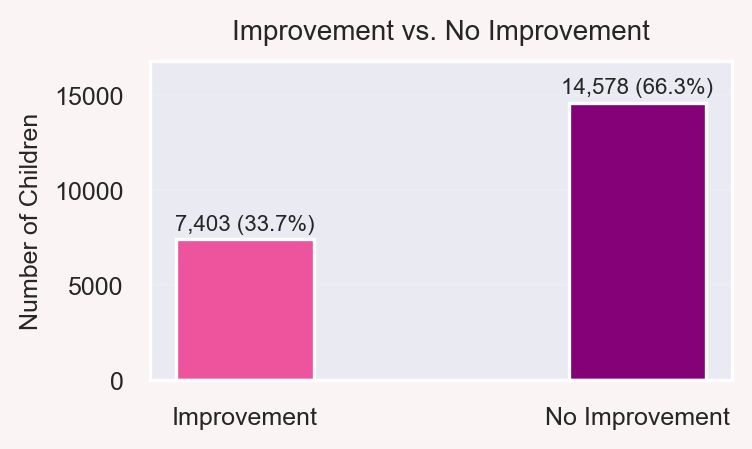

In [65]:
# --- Visualizing the distribution of the binary target variable ---

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from pathlib import Path
from bidi.algorithm import get_display

def heb(s):  
    return get_display(str(s))

# General settings
plt.rcParams["font.family"] = "Arial"
BG = "#FAF4F4"

# Process categories
vc = (df["target_binary_label"]
      .replace("לא שיפור", "No Improvement")
      .replace("שיפור", "Improvement")
      .value_counts()
      .reindex(["Improvement", "No Improvement"])
      .fillna(0).astype(int))

total  = int(vc.sum())
colors = cm.get_cmap("RdPu")(np.linspace(0.55, 0.85, 2))

# Figure size
fig, ax = plt.subplots(figsize=(4, 2.5), facecolor=BG)
bars = ax.bar(vc.index, vc.values,
              color=colors, edgecolor="white", linewidth=1.2, width=0.35)

# Titles and axis labels
ax.set_title("Improvement vs. No Improvement", fontsize=10, pad=8)
ax.set_ylabel("Number of Children", fontsize=9, labelpad=4)
ax.tick_params(axis='x', labelsize=9)
ax.tick_params(axis='y', labelsize=9)

# Gridlines
ax.grid(axis="y", alpha=0.15, linestyle="-", linewidth=0.6)
ax.grid(axis="x", visible=False)

ax.set_ylim(0, vc.max() * 1.15)

# Text labels above bars
for b, n in zip(bars, vc.values):
    pct = n / total * 100 if total else 0
    ax.text(b.get_x() + b.get_width()/2,
            b.get_height() + (vc.max()*0.02),
            f"{n:,} ({pct:.1f}%)",
            ha="center", va="bottom", fontsize=8)

plt.tight_layout()

# Save + display
fig_dir = Path("reports/figures"); fig_dir.mkdir(parents=True, exist_ok=True)
outfile = fig_dir / "improvement_status_distribution.png"
fig.savefig(outfile, dpi=200, bbox_inches="tight", facecolor=BG)
plt.close(fig)

from IPython.display import Image, display
display(Image(filename=str(outfile)))


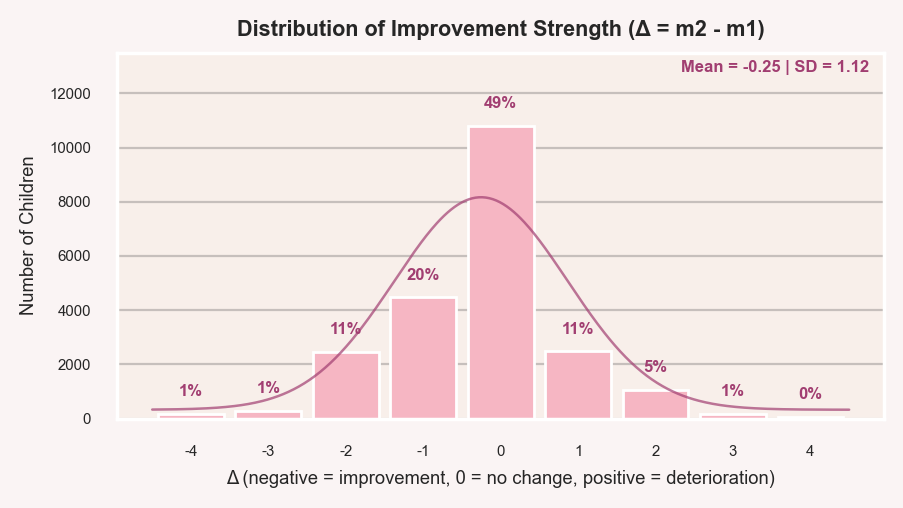

In [66]:
# --- Visualizing the distribution of the continuous target variable ---

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from pathlib import Path
from bidi.algorithm import get_display

def heb(s): return get_display(str(s))

# --- Colors and background ---
BG_OUT = "#FAF4F4"
BG_IN  = "#F8EFEA"
COL_HIST, COL_LINE = "#F6B6C3", "#A13E71"

plt.rcParams["font.family"] = "Arial"

# --- Data ---
vals = df["target_delta_strength"].dropna().astype(float)
bins = np.arange(-4.5, 5.5, 1)
mu, sigma = vals.mean(), vals.std(ddof=1)
x = np.linspace(-4.5, 4.5, 400)
pdf = norm.pdf(x, mu, sigma) * len(vals) * (bins[1] - bins[0])

# --- Scaling ---
S = 0.6
rc = {
    "figure.dpi":      200,
    "font.size":       10 * S,
    "axes.titlesize":  13 * S,
    "axes.labelsize":  11 * S,
    "xtick.labelsize":  9 * S,
    "ytick.labelsize":  9 * S,
    "lines.linewidth": 2.5 * S,
}

# --- Plot ---
with plt.rc_context(rc):
    fig, ax = plt.subplots(figsize=(7.5*S, 4.2*S), facecolor=BG_OUT)
    ax.set_facecolor(BG_IN)

    # Histogram
    counts, edges, bars = ax.hist(
        vals, bins=bins, rwidth=0.85,
        color=COL_HIST, edgecolor="white",
        zorder=1
    )

    # Normal curve (slightly elevated)
    elevation = max(counts) * 0.03
    ax.plot(x, pdf + elevation,
        color=COL_LINE, alpha=0.7, zorder=2,
        linewidth=0.9)

    # Titles and axes
    ax.set_title("Distribution of Improvement Strength (Δ = m2 - m1)", fontweight="bold")
    ax.set_xlabel("Δ (negative = improvement, 0 = no change, positive = deterioration)")
    ax.set_ylabel("Number of Children")
    ax.set_xticks(range(-4, 5))
    ax.set_xticklabels([str(t) for t in range(-4, 5)])

    # Gridlines
    ax.set_axisbelow(True)
    ax.grid(axis="y", linestyle="-", linewidth=0.8, alpha=0.25, color="0.2")
    ax.grid(False, axis="x")

    # Limits
    ymax = max(counts) * 1.25
    ax.set_ylim(0, ymax)
    fig.subplots_adjust(top=0.90)

    # Percent labels above bars
    total = counts.sum()
    offset = max(counts) * 0.05
    for count, left, right in zip(counts, edges[:-1], edges[1:]):
        if count > 0:
            center = (left + right) / 2
            pct = count / total * 100
            ax.text(center, count + offset,
                    f"{pct:.0f}%",
                    ha="center", va="bottom",
                    color=COL_LINE, fontweight="bold", zorder=3)

    # Mean and SD
    ax.text(0.98, 0.98,
            f"Mean = {mu:.2f} | SD = {sigma:.2f}",
            transform=ax.transAxes, ha="right", va="top",
            color=COL_LINE, fontweight="bold", zorder=3)

    plt.tight_layout()

    # Save + display
    fig_dir = Path("reports/figures"); fig_dir.mkdir(parents=True, exist_ok=True)
    outfile = fig_dir / "continuous_improvement_distribution.png"
    fig.savefig(outfile, dpi=rc["figure.dpi"], bbox_inches="tight", facecolor=BG_OUT)
    plt.close(fig)

    from IPython.display import Image, display
    display(Image(filename=str(outfile)))


# Variable Type Analysis (Numeric, Dummy, Categorical)

In [67]:
import numpy as np
import pandas as pd
from pathlib import Path
from datetime import datetime

# === 0) Technical identifiers / codes that have no analytical numeric meaning ===
id_cols_whitelist = [
    "id", "host_id", "hostid", "child_id", "case_id", "id_number",
    "ref_id_360_m1", "ref_id_360_m2",
    "yeshuv_code",
    "institution_code_m1", "institution_code_m2",
    "service_code",
    "program_code_m1", "program_code_m2",
    "_row_order_m1", "_row_order_m2",
    "forms_same_day_m1", "forms_same_day_m2"
]

id_cols = [c for c in id_cols_whitelist if c in df.columns]

# === 1) Numeric columns (excluding technical identifiers) ===
# Also includes bool and boolean (nullable)
num_cols_all = df.select_dtypes(include=[np.number, "bool", "boolean"]).columns.tolist()
num_cols = [c for c in num_cols_all if c not in id_cols]

# === 2) Dummies: columns whose non-null values are only 0/1 or True/False ===
def is_dummy_series(s: pd.Series) -> bool:
    # Empty after dropna → not dummy
    non_null = s.dropna()
    if non_null.empty:
        return False

    # Boolean dtypes → dummy
    if pd.api.types.is_bool_dtype(s) or str(s.dtype) == "boolean":
        return True

    # Numeric (including nullable Int64/Float64)
    if pd.api.types.is_numeric_dtype(s):
        vals = pd.to_numeric(non_null, errors="coerce").dropna().unique()
        return set(vals) <= {0, 1, 0.0, 1.0}

    return False  # textual/mixed → not dummy

dummy_cols = [c for c in num_cols if is_dummy_series(df[c])]

# === 3) Numeric but not dummy (still excluding technical identifiers) ===
num_non_dummy_cols = [c for c in num_cols if c not in dummy_cols]

# === 4) Categorical columns: all non-numeric and non-ID columns ===
cat_cols = [c for c in df.columns if c not in num_cols_all and c not in id_cols]

# === 5) DataFrames split (without modifying the original df) ===
df_id            = df[id_cols].copy()            if id_cols else pd.DataFrame(index=df.index)
df_dummy         = df[dummy_cols].copy()         if dummy_cols else pd.DataFrame(index=df.index)
df_num_non_dummy = df[num_non_dummy_cols].copy() if num_non_dummy_cols else pd.DataFrame(index=df.index)
df_categorical   = df[cat_cols].copy()           if cat_cols else pd.DataFrame(index=df.index)

# === 6) Summary prints ===
print(" Technical ID columns (excluded from analysis):", len(id_cols))
print(" Numeric non-dummy columns:", len(num_non_dummy_cols))
print(" Dummy (0/1) columns:", len(dummy_cols))
print(" Categorical (text/category) columns:", len(cat_cols))
print(df_id.shape, df_num_non_dummy.shape, df_dummy.shape, df_categorical.shape)

# === 7) Safe saving that does not overwrite existing files ===
out_dir = Path("data/interim"); out_dir.mkdir(parents=True, exist_ok=True)
ts = datetime.now().strftime("%Y%m%d_%H%M")

def _with_timestamp(path: Path) -> Path:
    return path.with_name(f"{path.stem}_{ts}{path.suffix}")

def safe_save_pickle(df_obj, path: Path):
    save_path = _with_timestamp(path) if path.exists() else path
    df_obj.to_pickle(save_path)
    print(f"✅ Saved: {save_path}")

def safe_save_csv(df_obj, path: Path):
    save_path = _with_timestamp(path) if path.exists() else path
    df_obj.to_csv(save_path, index=False, encoding="utf-8-sig")
    print(f"✅ Saved: {save_path}")

# 7.1) Snapshot of the original DF (without overwriting)
safe_save_pickle(df, out_dir / "EDA.pkl")
safe_save_csv(df, out_dir / "EDA.csv")

# 7.2) Saving the splits to separate files (also without overwriting)
safe_save_pickle(df_id,            out_dir / "eda_ids.pkl")
safe_save_pickle(df_dummy,         out_dir / "eda_dummy.pkl")
safe_save_pickle(df_num_non_dummy, out_dir / "eda_num_non_dummy.pkl")
safe_save_pickle(df_categorical,   out_dir / "eda_cat.pkl")


 Technical ID columns (excluded from analysis): 11
 Numeric non-dummy columns: 19
 Dummy (0/1) columns: 18
 Categorical (text/category) columns: 379
(21981, 11) (21981, 19) (21981, 18) (21981, 379)
✅ Saved: data\interim\EDA_20251113_2242.pkl
✅ Saved: data\interim\EDA_20251113_2242.csv
✅ Saved: data\interim\eda_ids_20251113_2242.pkl
✅ Saved: data\interim\eda_dummy_20251113_2242.pkl
✅ Saved: data\interim\eda_num_non_dummy_20251113_2242.pkl
✅ Saved: data\interim\eda_cat_20251113_2242.pkl


In [68]:
# ===============================================================
# 🔍 Completeness check after saving eda_num.pkl
# Ensures it did not lose text/dummy columns and that the number
# of columns matches eda_cat.pkl
# ===============================================================
import pandas as pd
from pathlib import Path

eda_num_path = Path("data/interim/eda_num.pkl")
eda_cat_path = Path("data/interim/eda_cat.pkl")

df_num = pd.read_pickle(eda_num_path)
df_cat = pd.read_pickle(eda_cat_path)

# --- Main checks ---
n_cols_num = df_num.shape[1]
n_cols_cat = df_cat.shape[1]
n_text_num = df_num.select_dtypes(include=["object", "string", "category"]).shape[1]
n_dummy_num = sum(df_num.nunique(dropna=True) == 2)  # rough estimate of dummy columns

print(f"eda_num → {n_cols_num:,} columns (of which {n_text_num} textual, {n_dummy_num} dummies)")
print(f"eda_cat → {n_cols_cat:,} columns")

# --- Warnings if discrepancies are found ---
if n_cols_num < n_cols_cat:
    print("⚠️ Warning: eda_num has fewer columns than eda_cat — categorical columns may have been overwritten.")
if n_text_num == 0:
    print("❌ No textual columns in eda_num — likely loaded/saved from the wrong file.")
else:
    print("✅ Check passed — eda_num contains text and/or dummy columns and the structure looks reasonable.")


eda_num → 428 columns (of which 78 textual, 84 dummies)
eda_cat → 428 columns
✅ Check passed — eda_num contains text and/or dummy columns and the structure looks reasonable.


## 1) Numeric / Continuous Features

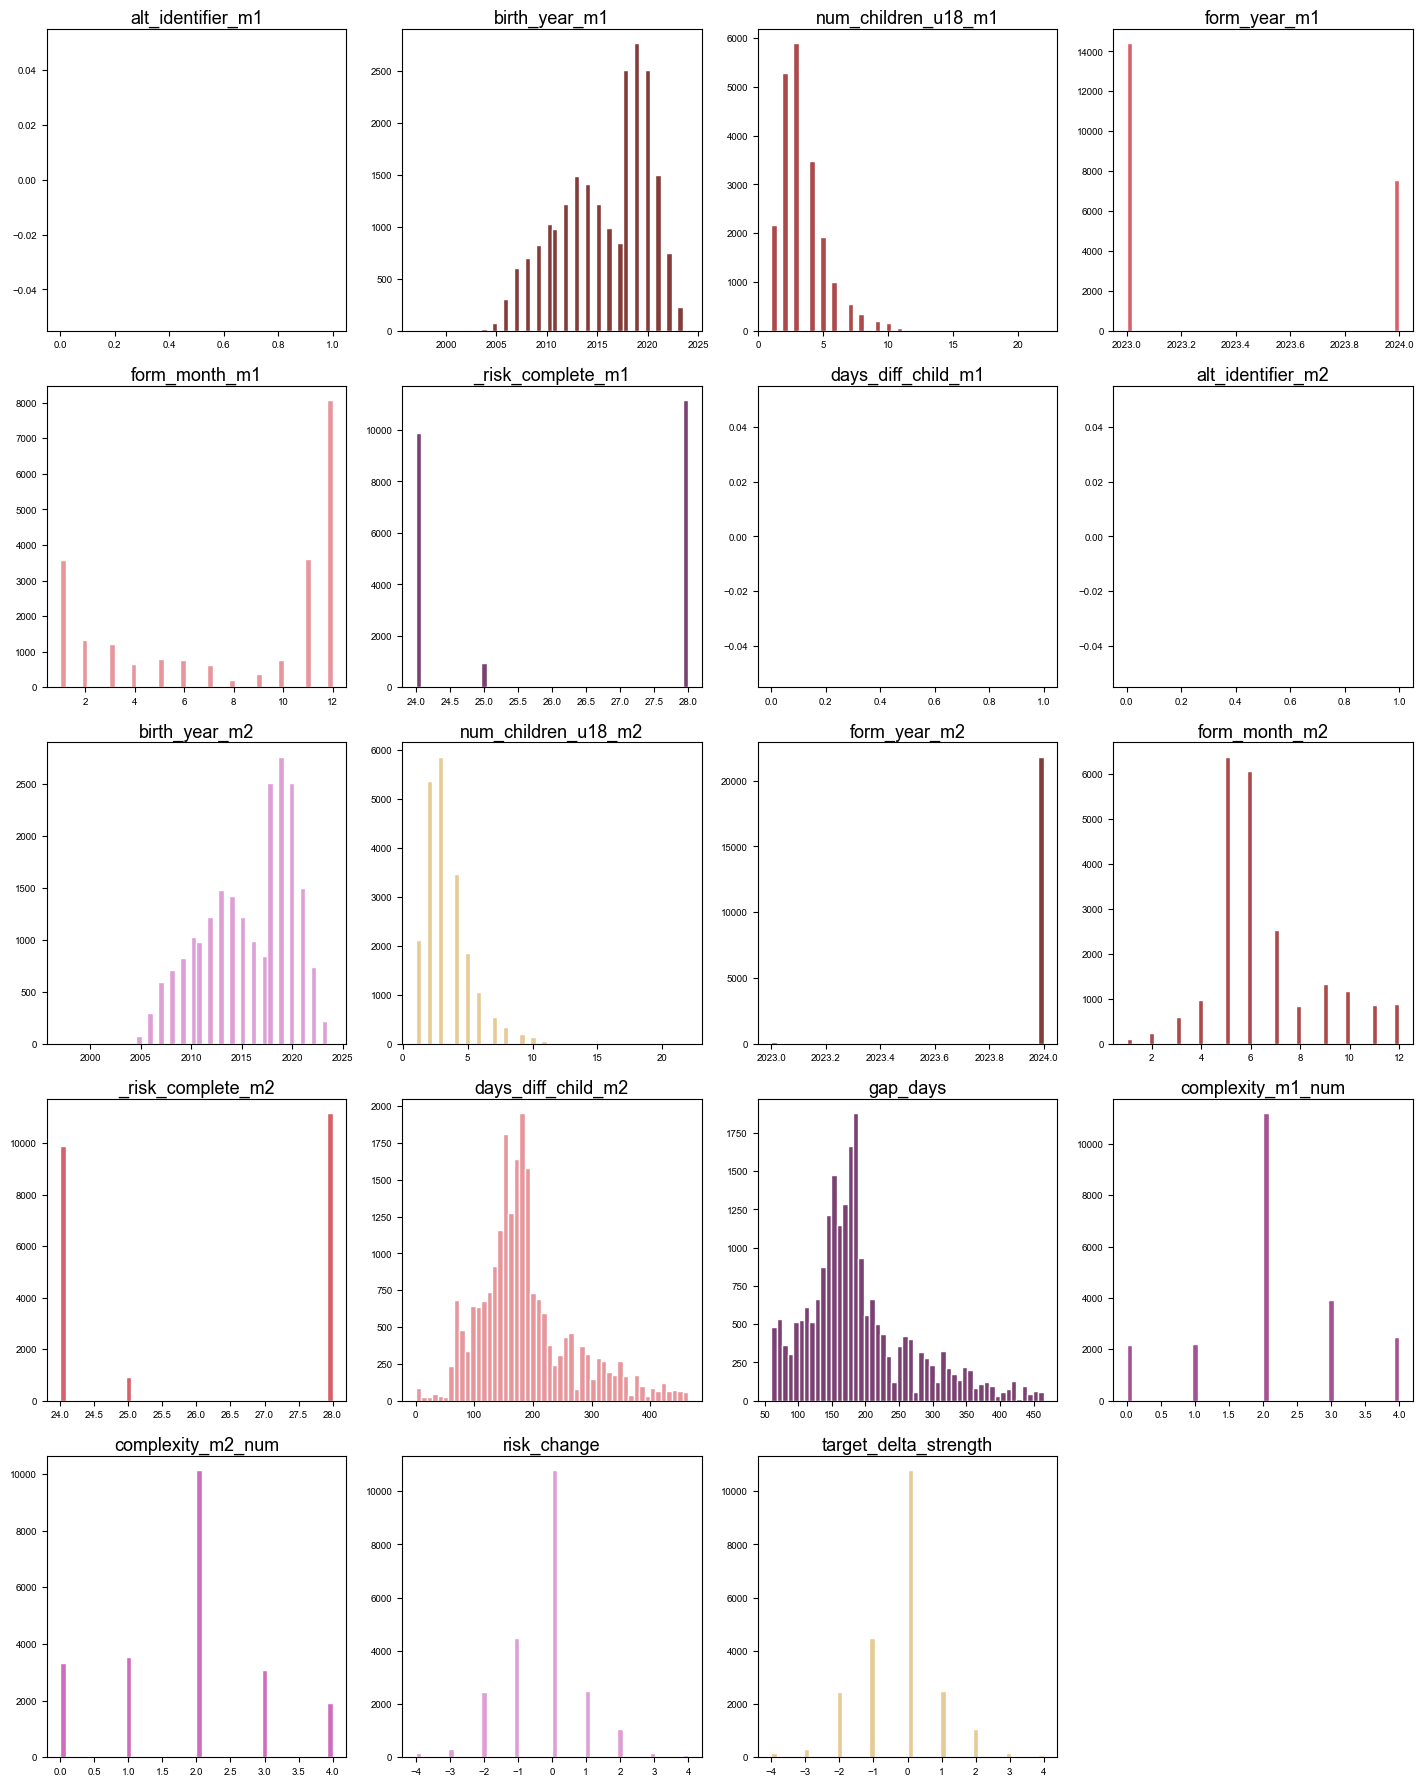

In [39]:
# Display histogram for all numerical (non-dummy) variables to inspect their distributions

import math
import matplotlib.pyplot as plt
from itertools import cycle

cols = df_num_non_dummy.columns.tolist()
n = len(cols)
ncols = 4
nrows = math.ceil(n / ncols)
cell = 3.6

palette = list(plt.cm.tab20b.colors[-9:])
color_cycle = cycle(palette)

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*cell, nrows*cell))
axes_flat = axes.ravel() if nrows * ncols > 1 else [axes]

for ax in axes_flat:
    ax.axis('off') 

for i, (col, ax) in enumerate(zip(cols, axes_flat)):
    ax.axis('on')
    ax.hist(df_num_non_dummy[col].dropna(), bins=50,
            color=next(color_cycle), edgecolor='white')
    ax.set_title(col, fontsize=13, pad=4)
    ax.tick_params(labelsize=7)

plt.tight_layout(pad=1.2, w_pad=1.2, h_pad=1.2)
plt.show()


It is evident that some of the distributions are skewed, so the next step is to quantify the degree of asymmetry by measuring their skewness.

In [40]:
# --- Skewness (measuring distribution asymmetry) ---

import pandas as pd

# Function to color values according to skew level
def highlight_skew(cell_value):
    high_positive = 'background-color: #b56576; color: white;'   
    high_negative = 'background-color: mediumseagreen; color: white;' 
    neutral = ''
    if cell_value > 1:
        return high_positive
    elif cell_value < -1:
        return high_negative
    else:
        return neutral

# Compute skewness for all non-dummy numeric variables
skew_df = pd.DataFrame(df_num_non_dummy.skew(), columns=['skewness']) \
            .sort_values(by='skewness', ascending=False)

skew_df.style.applymap(highlight_skew).format(precision=3)


,skewness
num_children_u18_m2,1.678
num_children_u18_m1,1.655
gap_days,1.054
days_diff_child_m2,0.967
form_month_m2,0.842
form_year_m1,0.655
complexity_m2_num,0.013
target_delta_strength,-0.055
risk_change,-0.055
_risk_complete_m2,-0.057


Most variables exhibit unbalanced (skewed) distributions — the majority of observations cluster at very low values, while a small number show very high values. This indicates that most forms have low completion rates, most measurement intervals fall between 3 and 8 months, and most children show no substantial change in risk level between measurements. The majority are rated around level 2 (“low complexity”), with relatively few at levels 3–4 (“high complexity” and “danger”). There is also a non-negligible share of children at levels 0–1 (“not identified” or “low risk”).
In the next steps, we will examine how handling outliers and missing values affects the distribution of these variables.

## 2) Categorical Features

In [41]:
%pip install --upgrade arabic-reshaper python-bidi


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\zoars\Desktop\Data Science\machine learning\ML_PROJECT\360 project\.venv311\Scripts\python.exe -m pip install --upgrade pip


In [42]:
import sys, importlib
print("Python:", sys.executable)
print("arabic_reshaper?", importlib.util.find_spec("arabic_reshaper") is not None)
print("python_bidi?", importlib.util.find_spec("bidi") is not None)


Python: C:\Users\zoars\Desktop\Data Science\machine learning\ML_PROJECT\360 project\.venv311\Scripts\python.exe
arabic_reshaper? True
python_bidi? True


In [43]:
import sys, subprocess, sys
subprocess.check_call([sys.executable, "-m", "pip", "install", "--upgrade",
                       "arabic-reshaper", "python-bidi"])


0

In [69]:
import arabic_reshaper
from bidi.algorithm import get_display
print("✅ Loaded successfully")

✅ Loaded successfully


short_cols: 361 | long_cols: 19


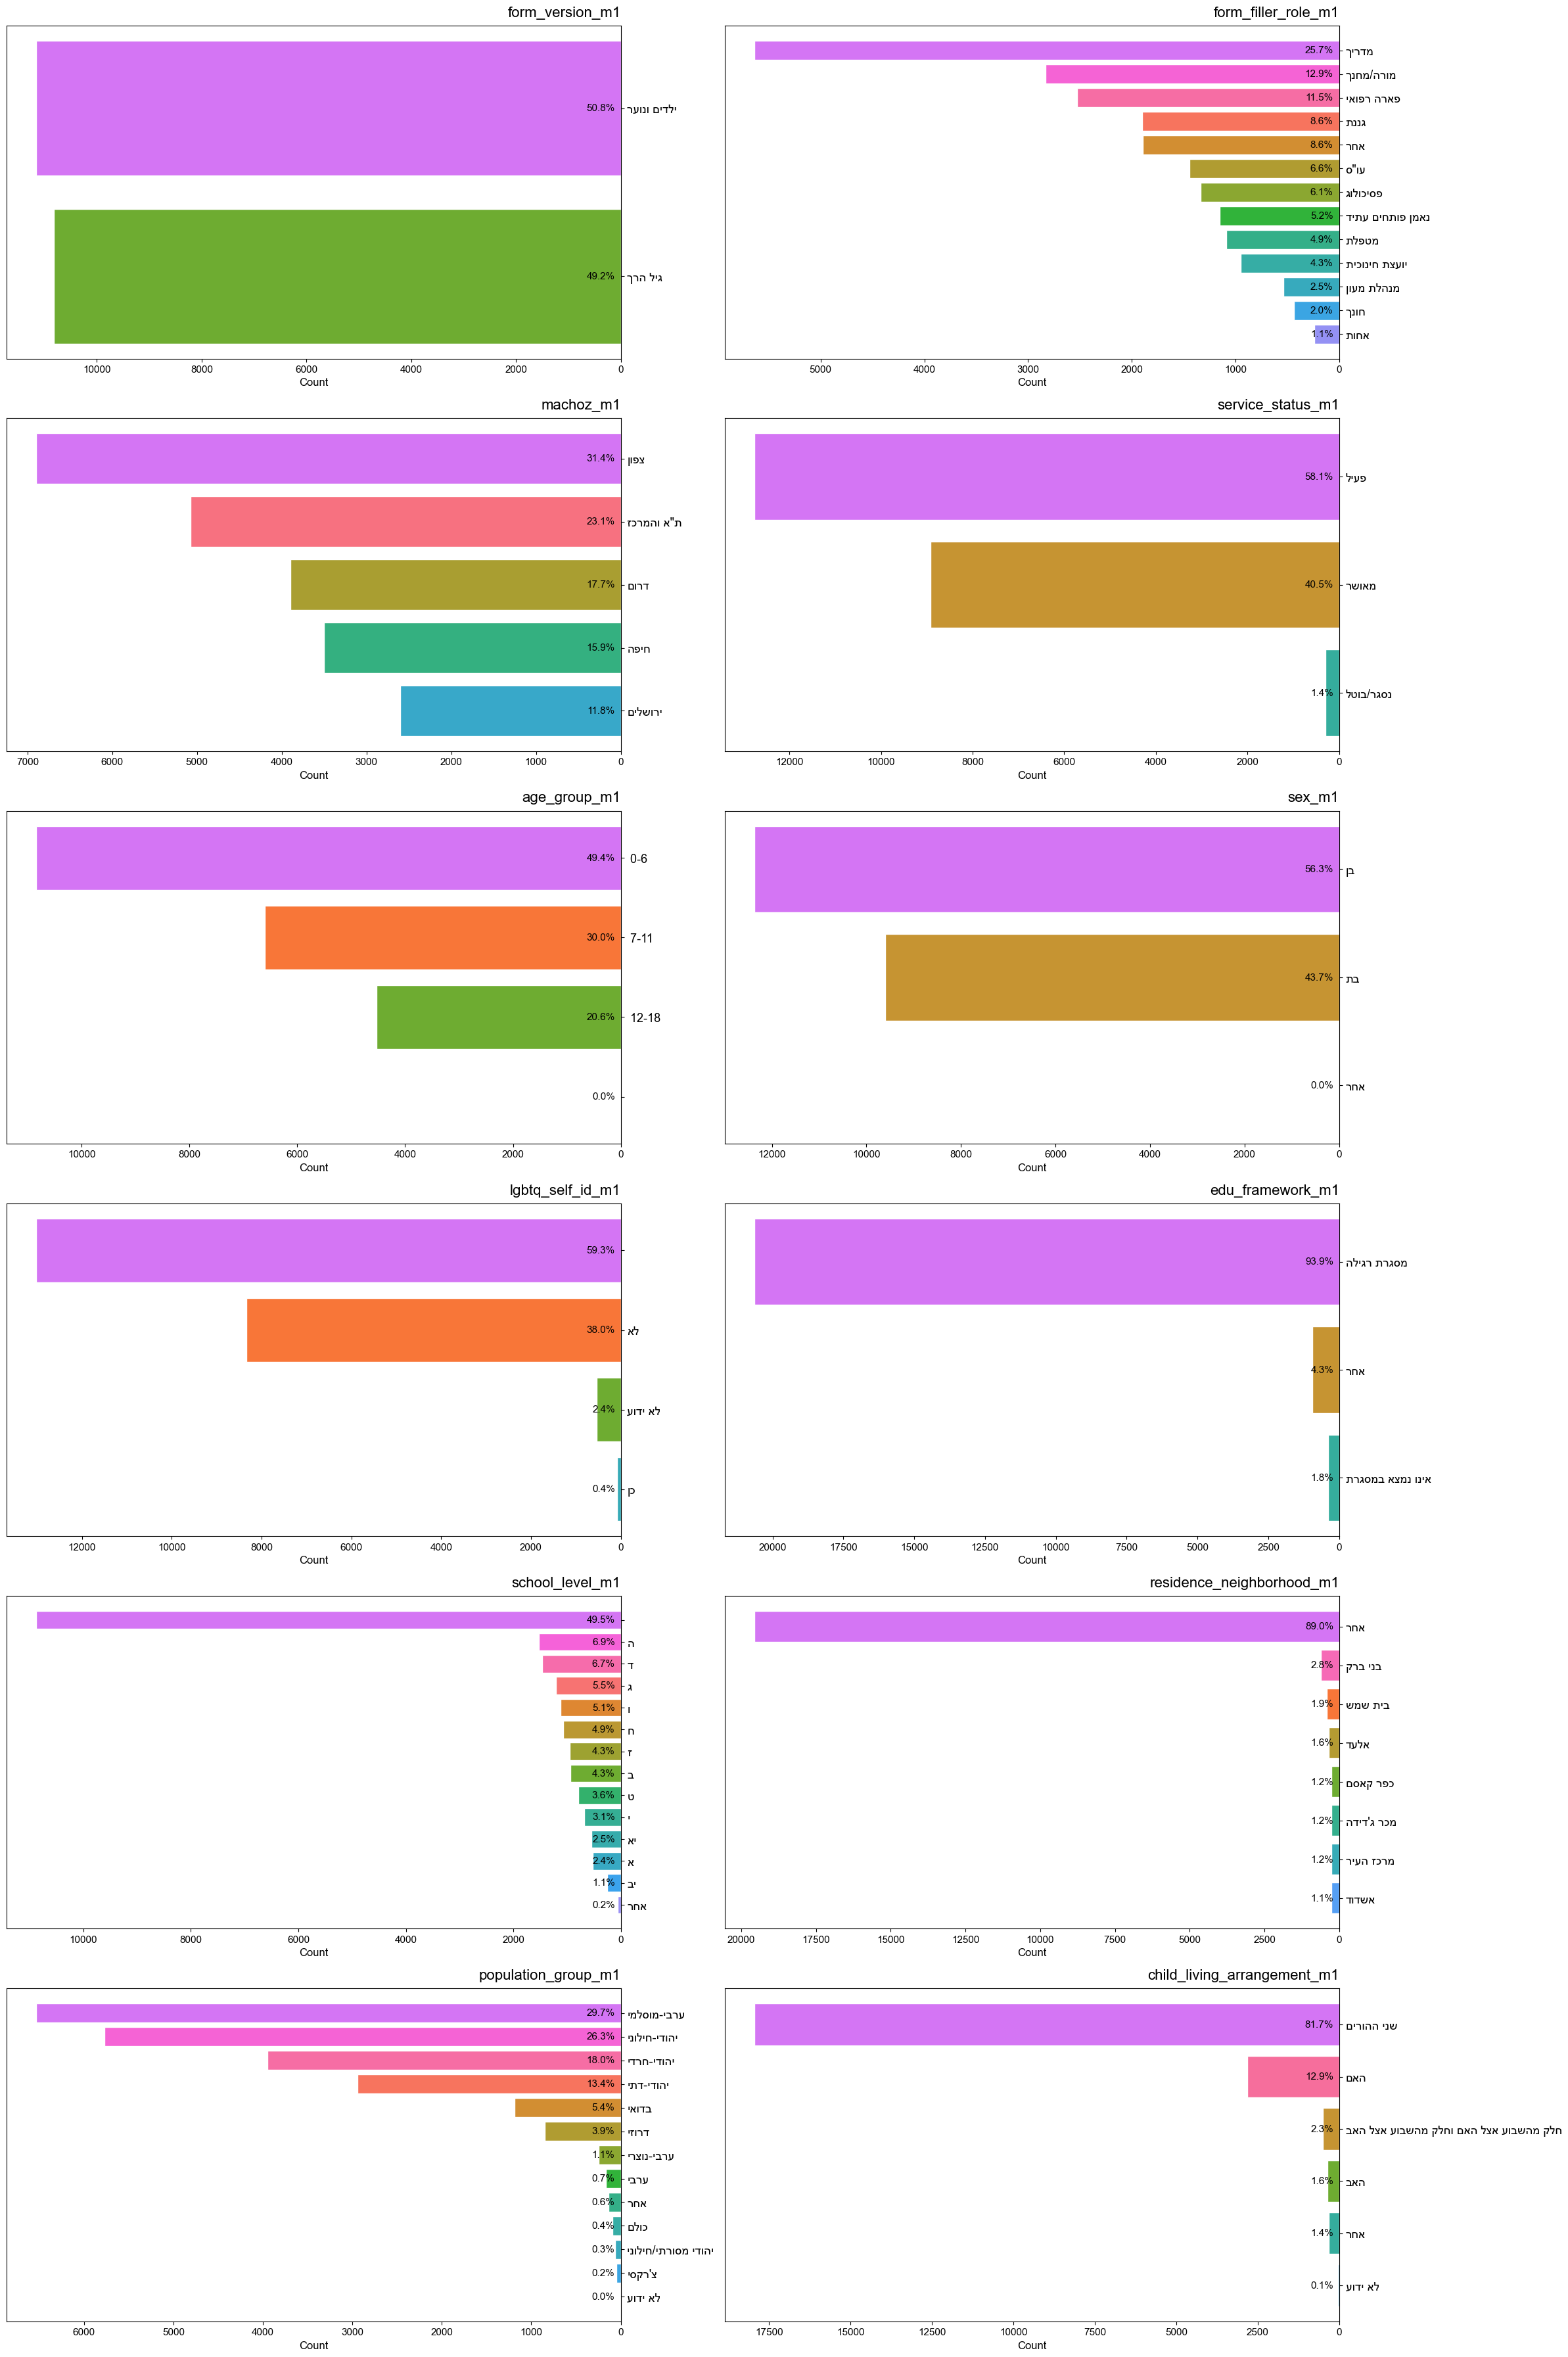

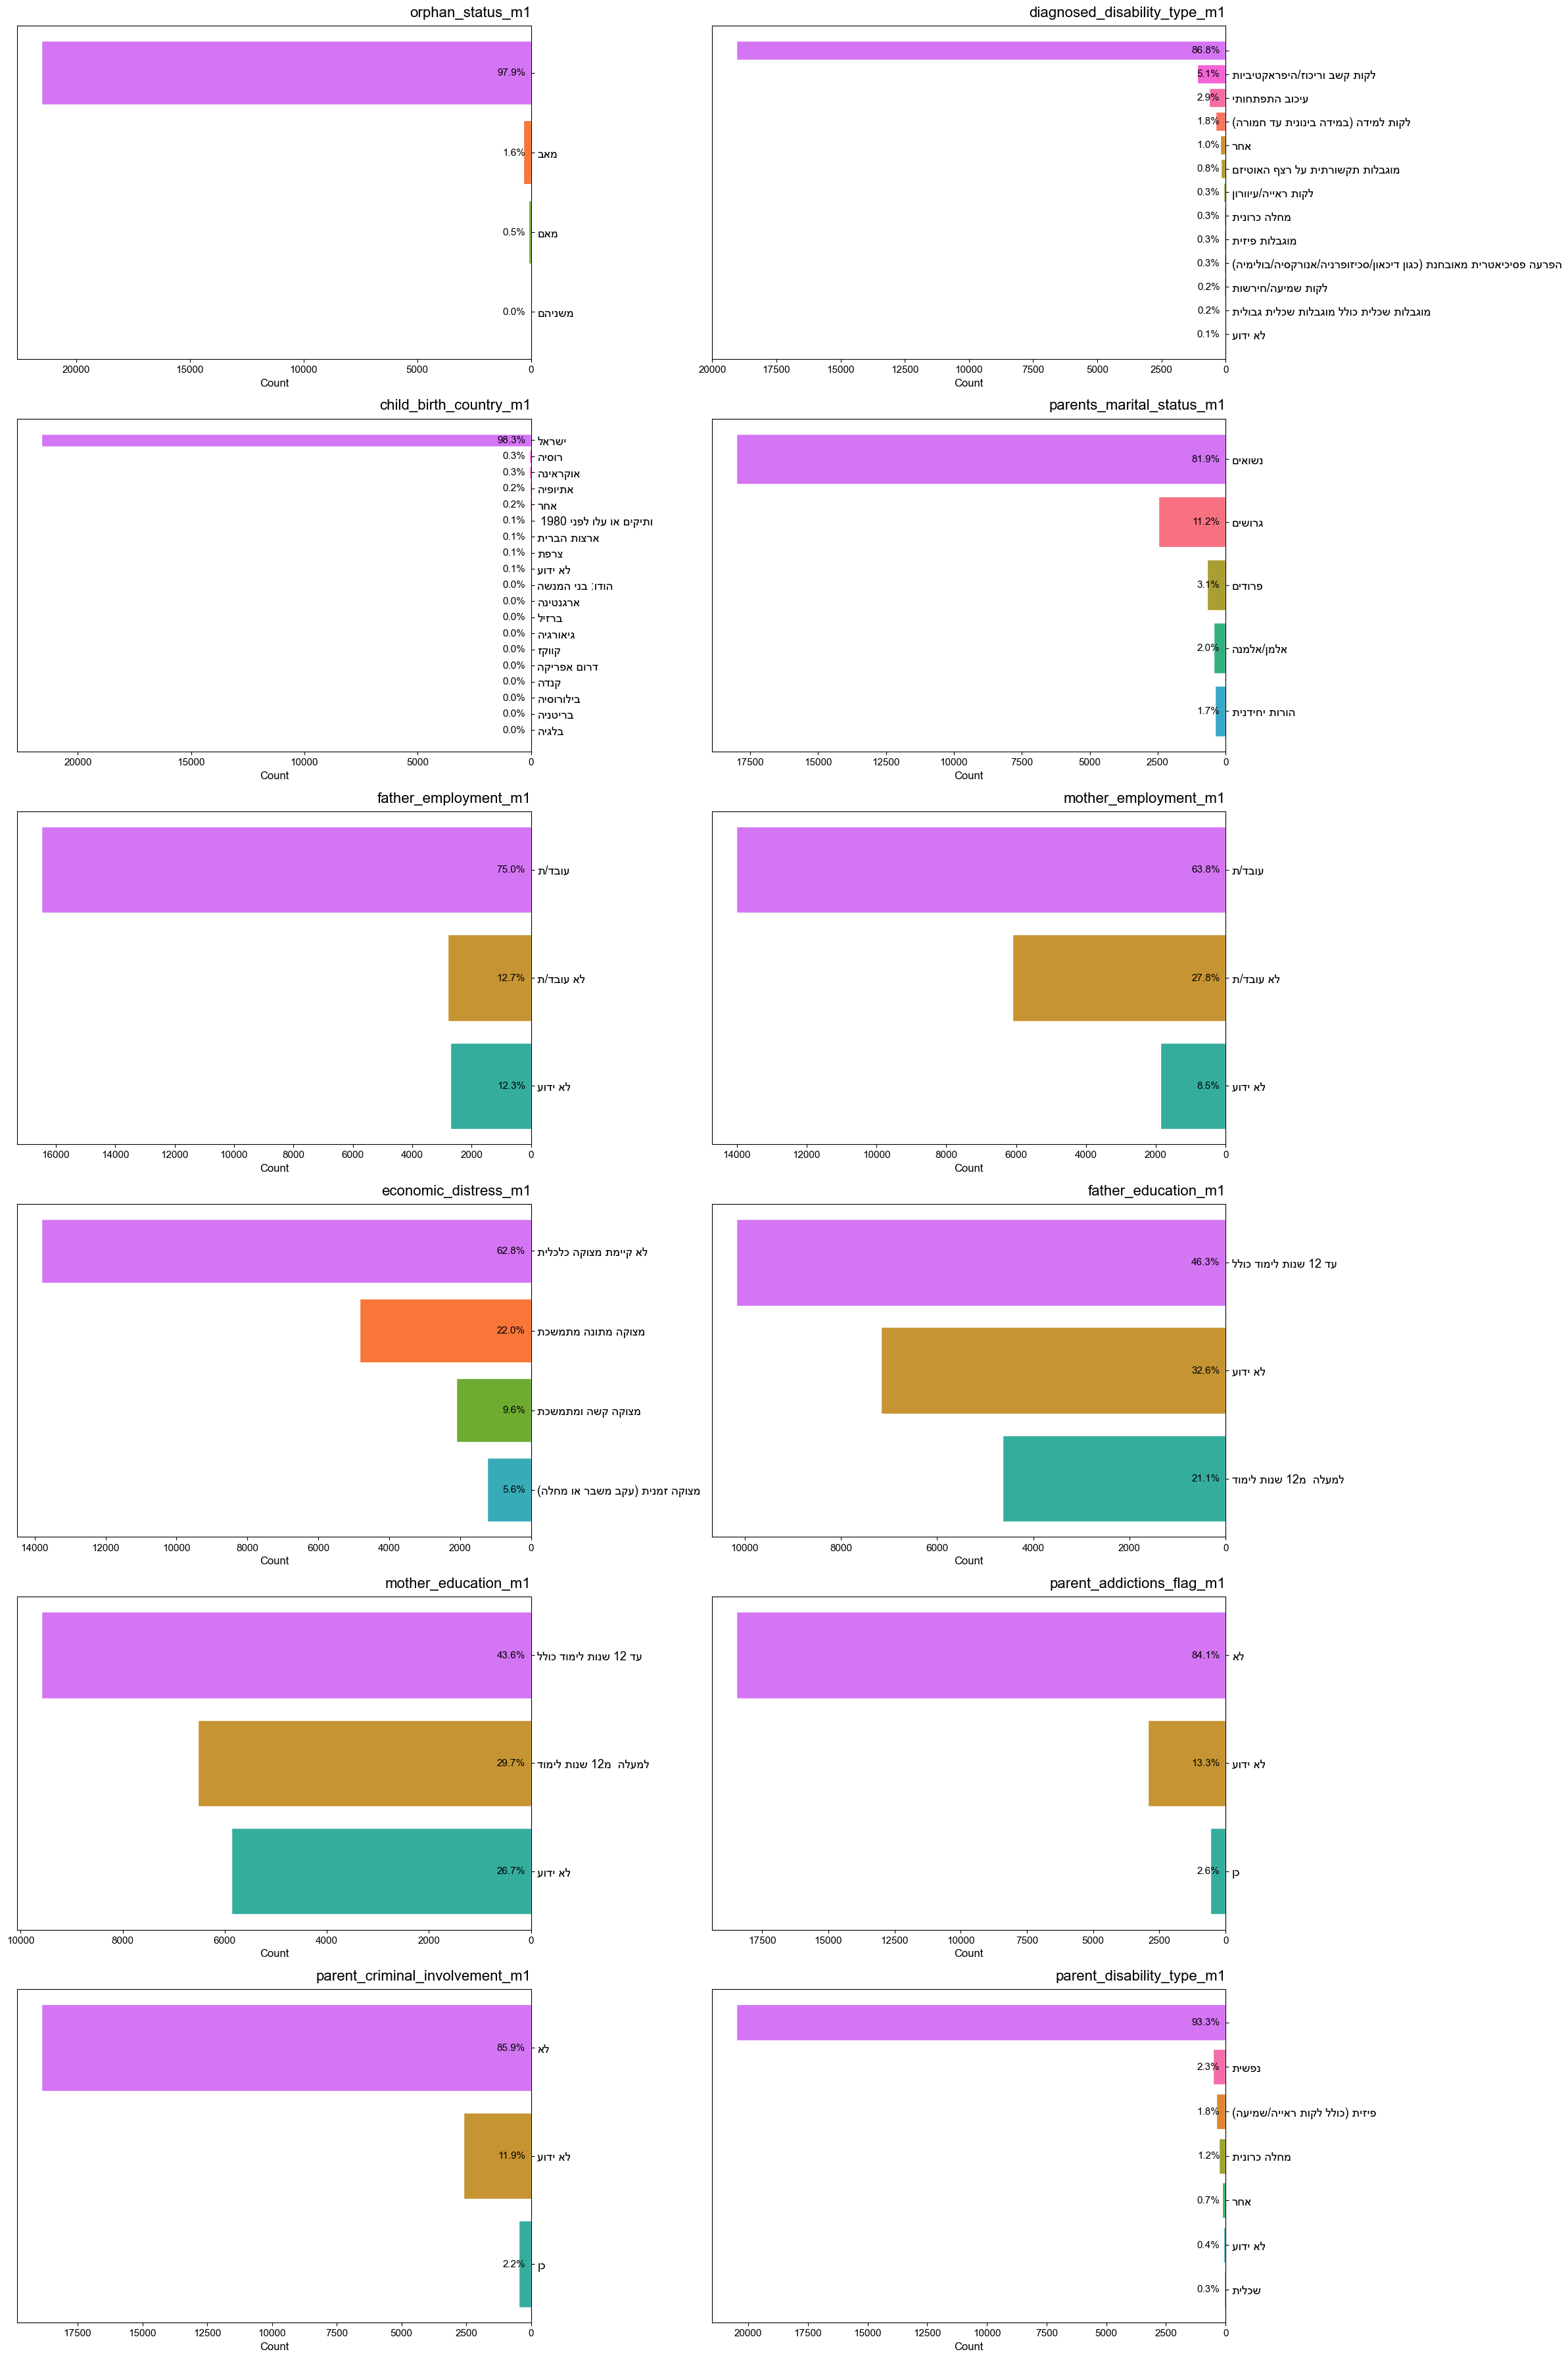

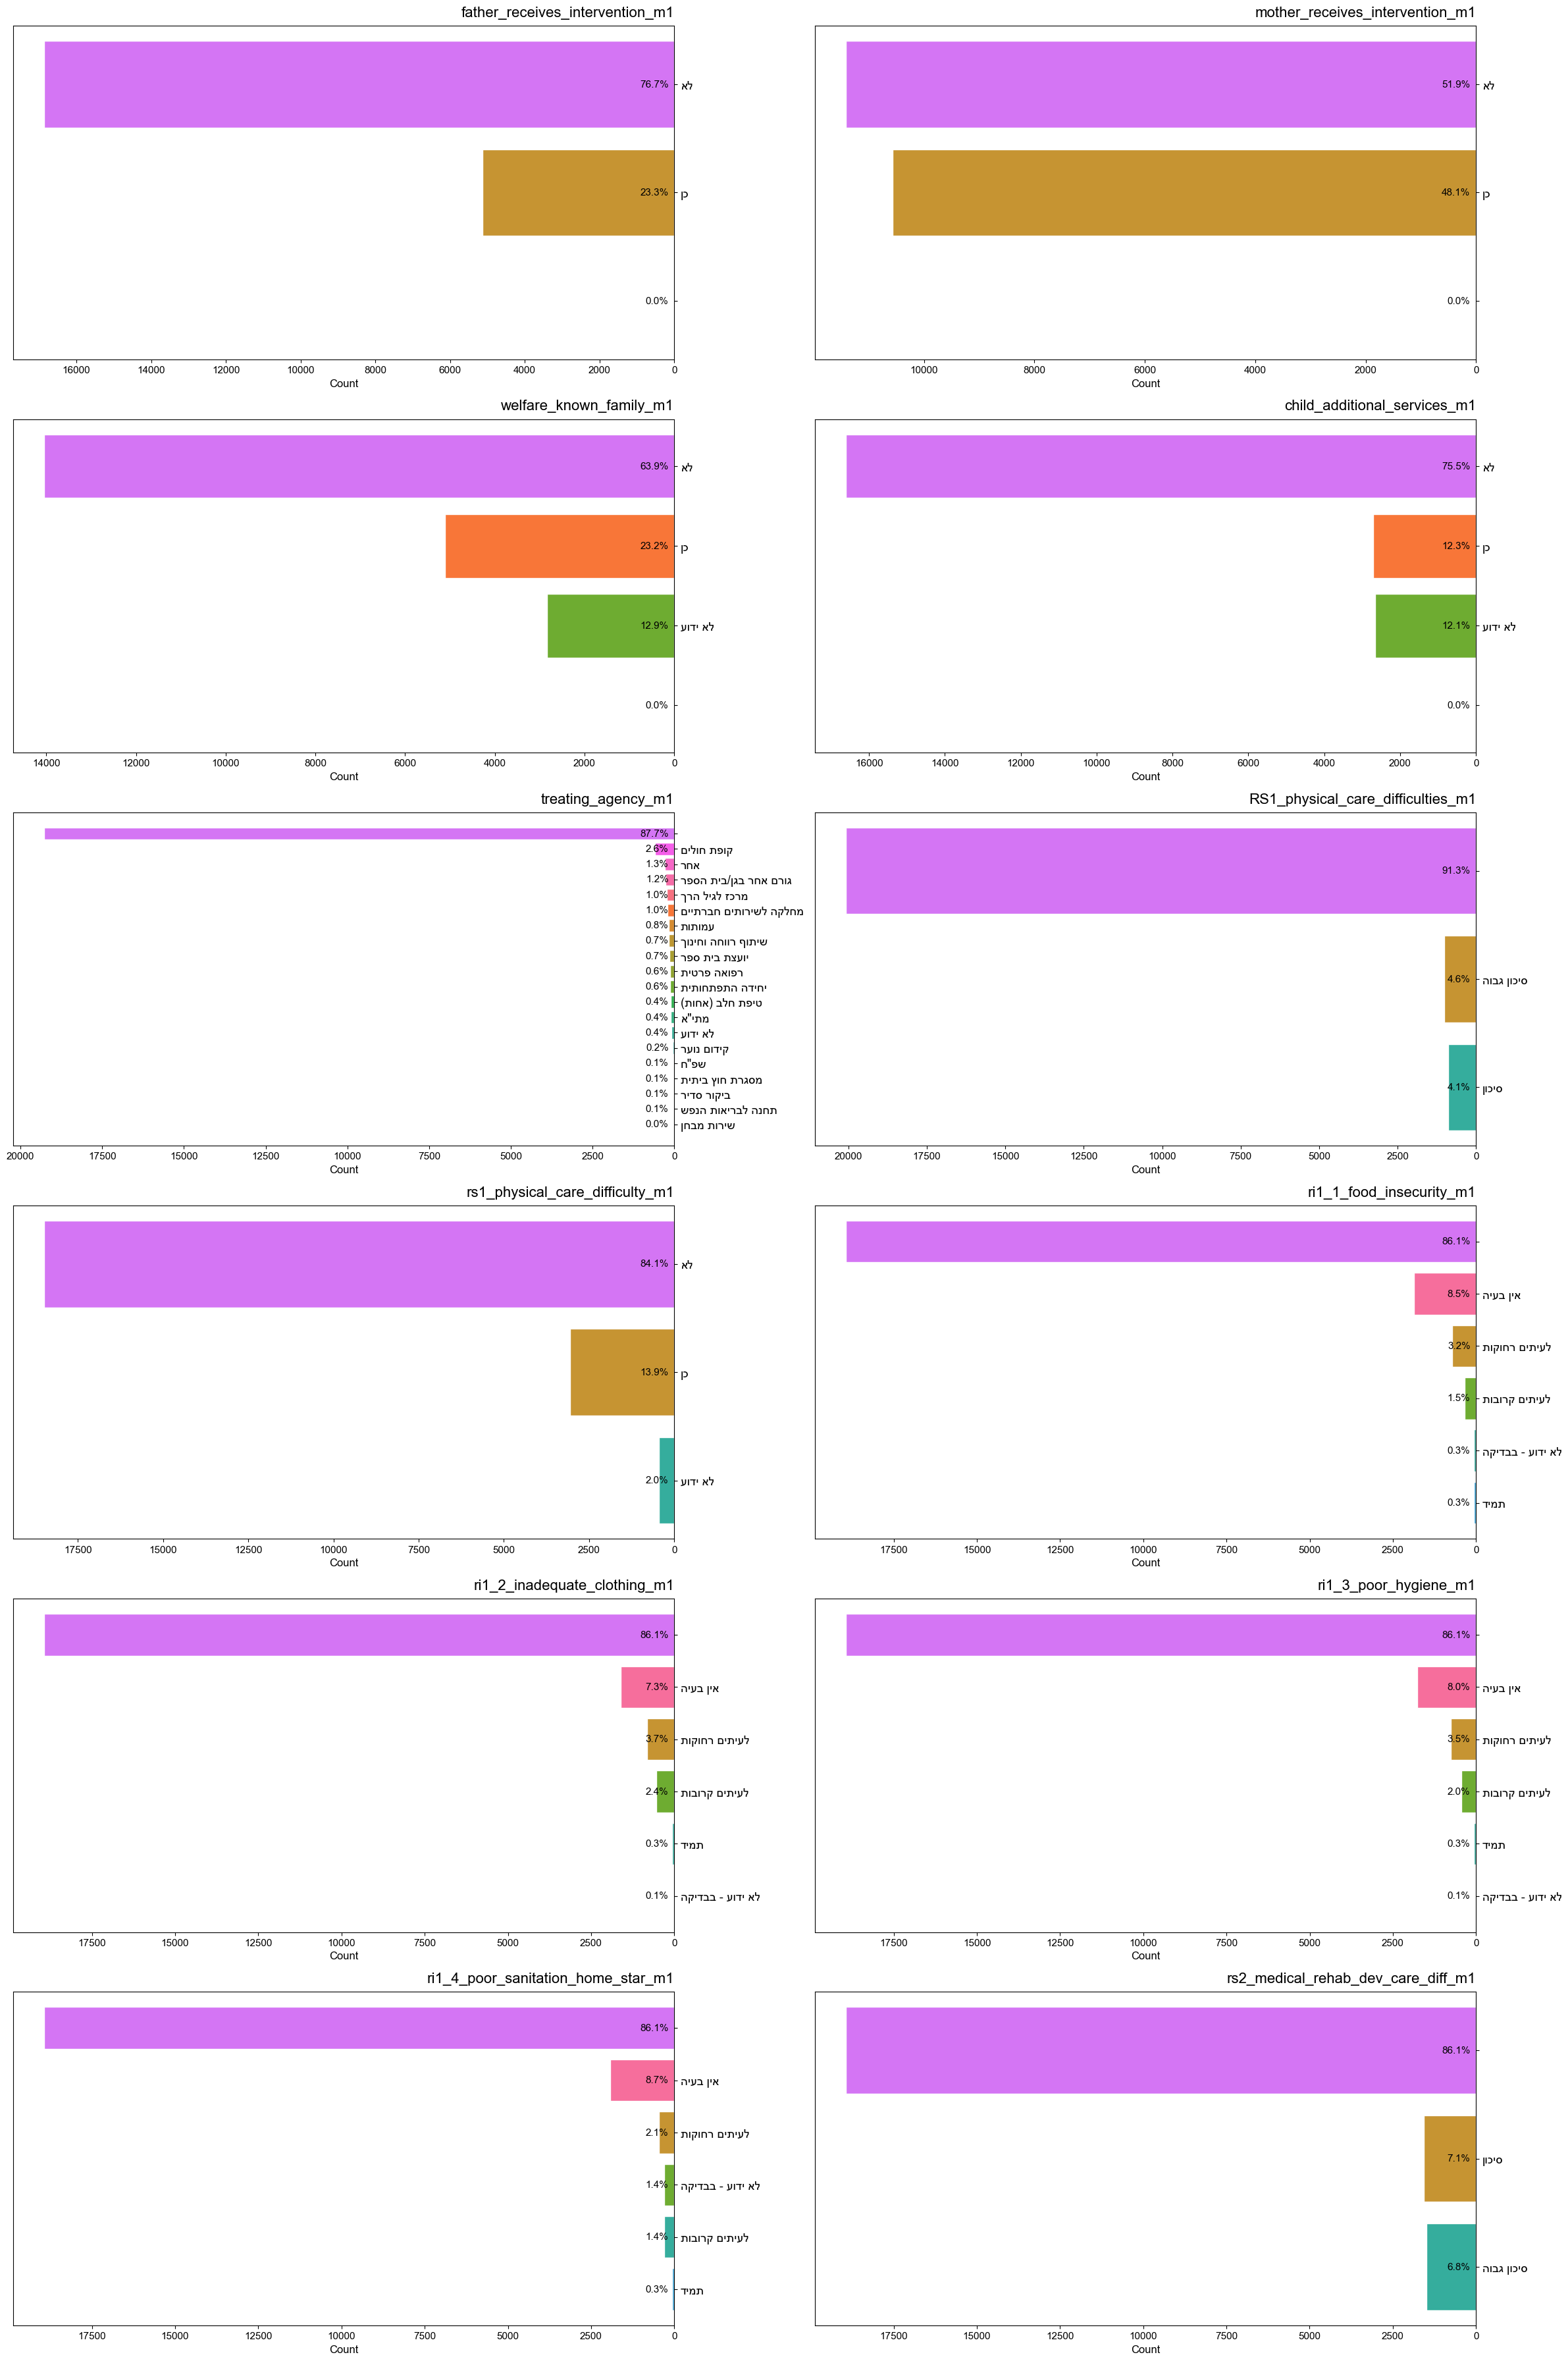

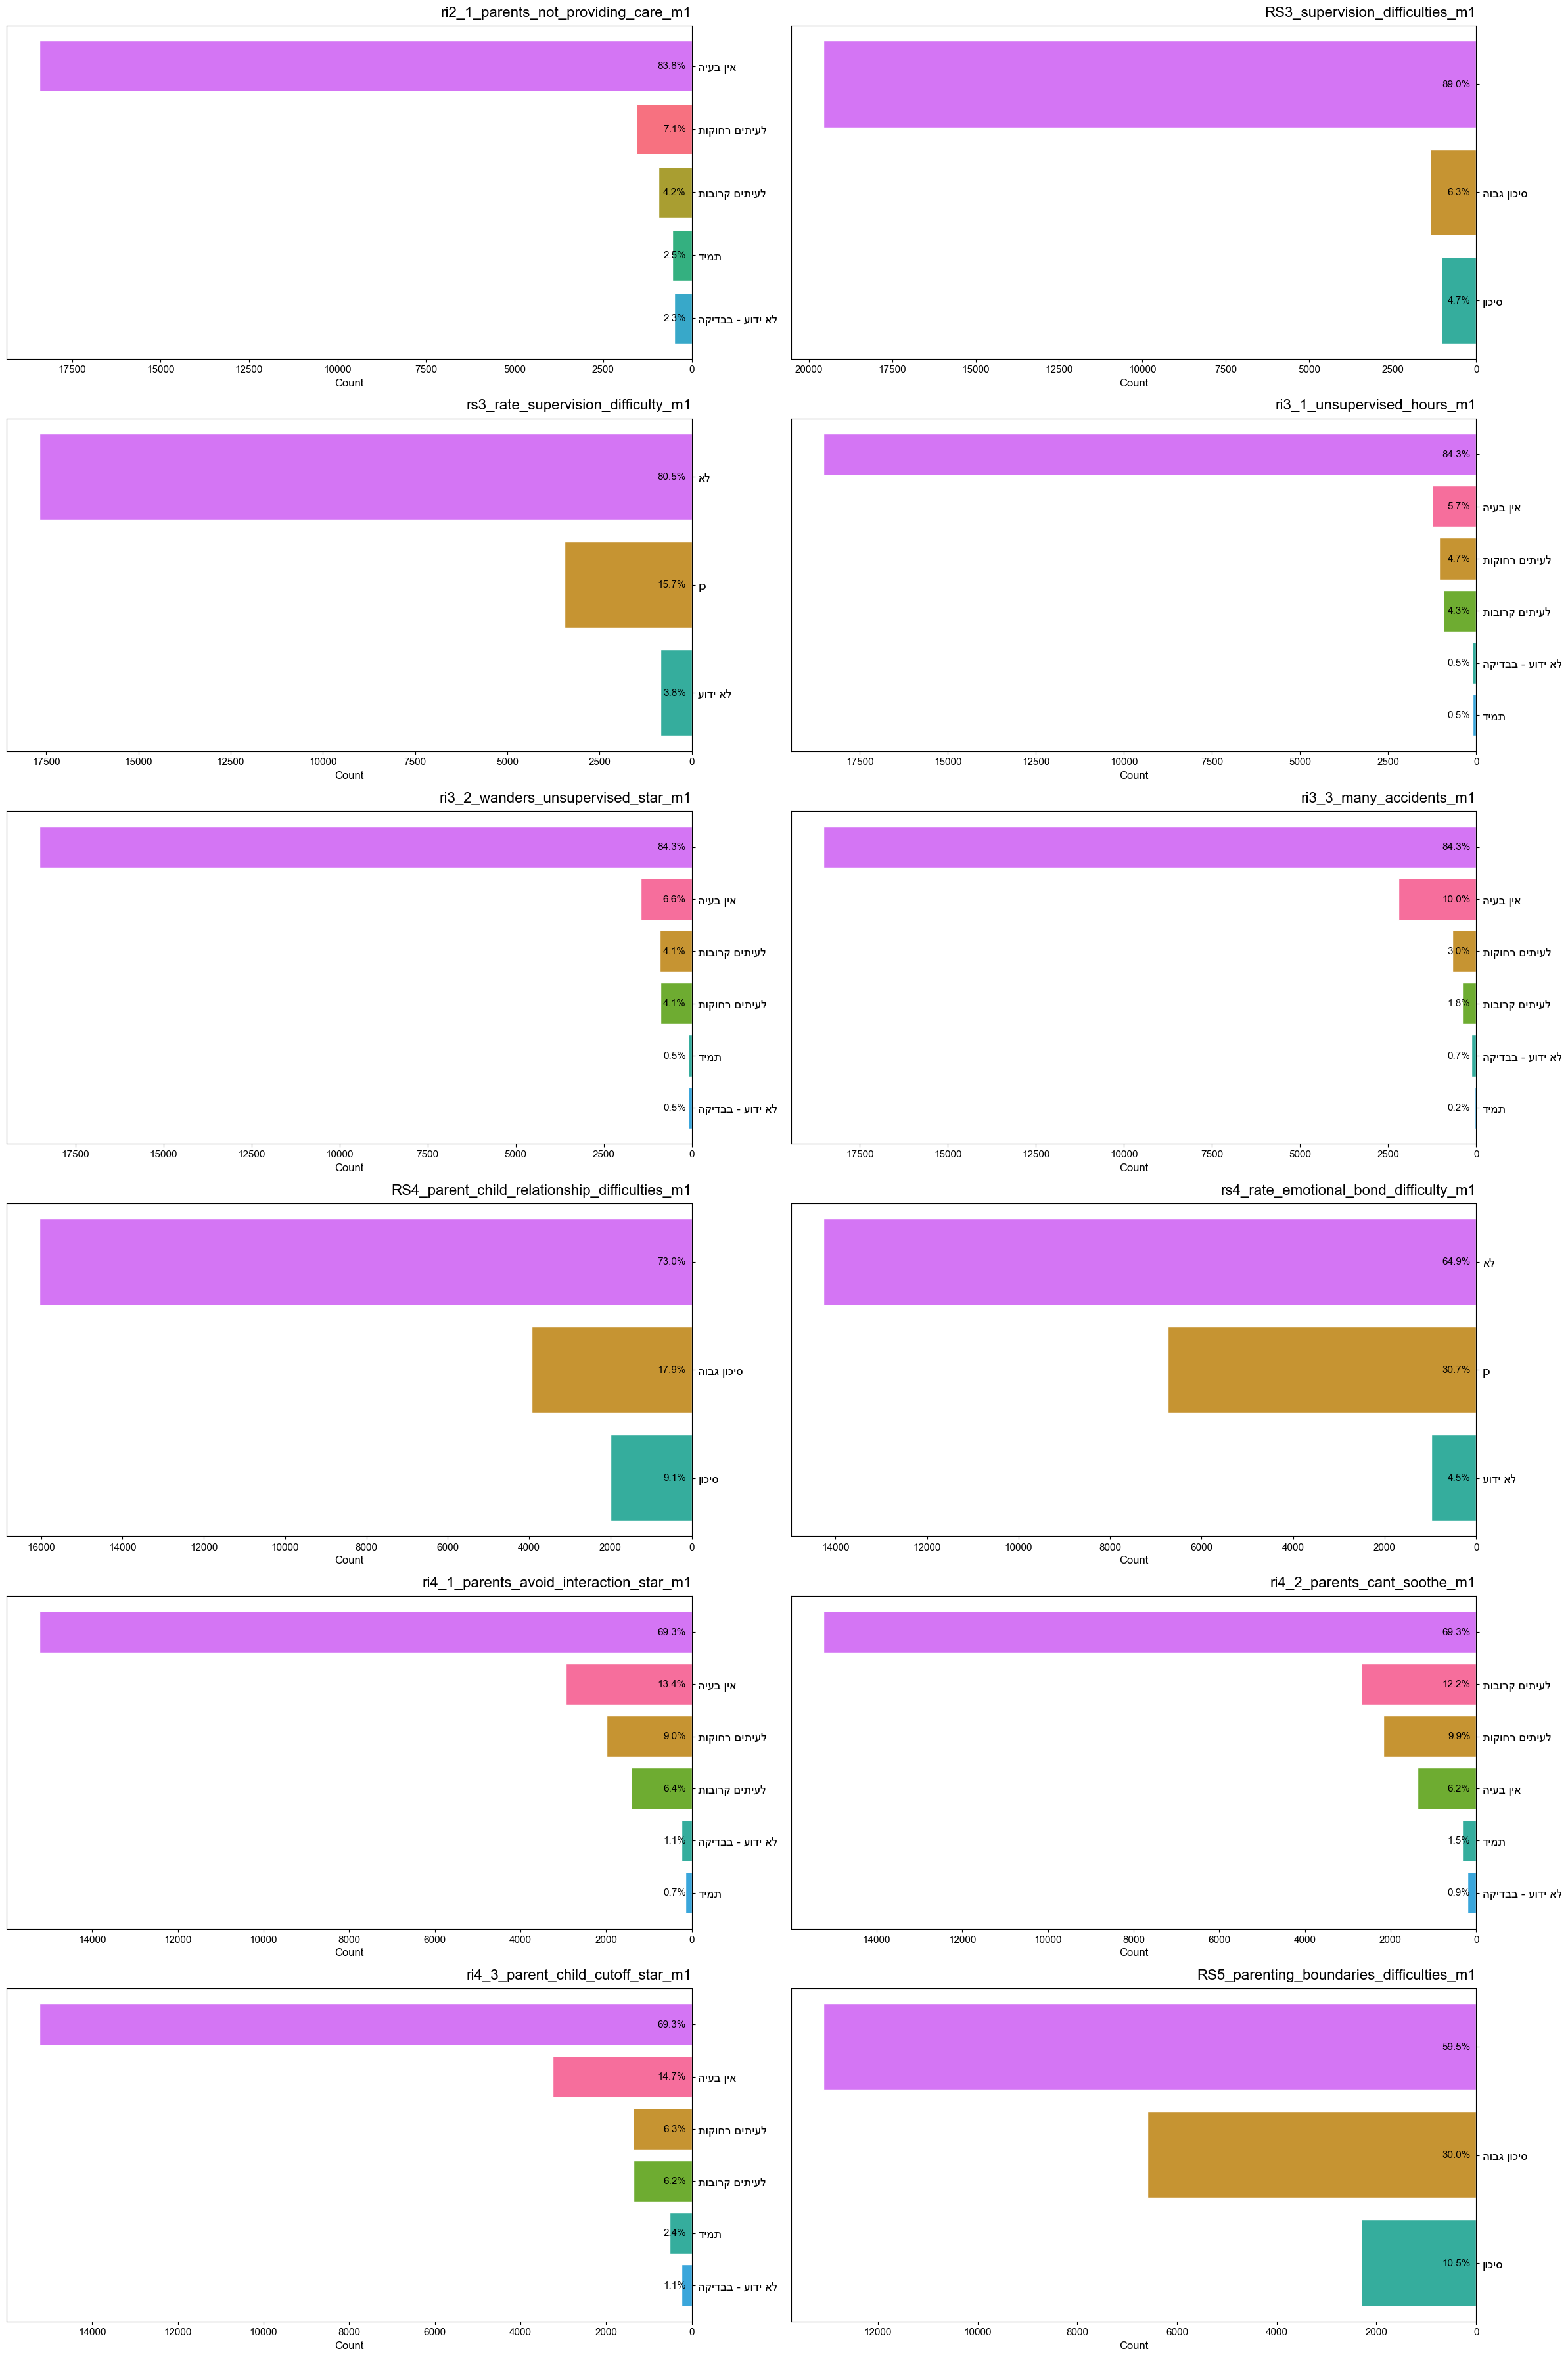

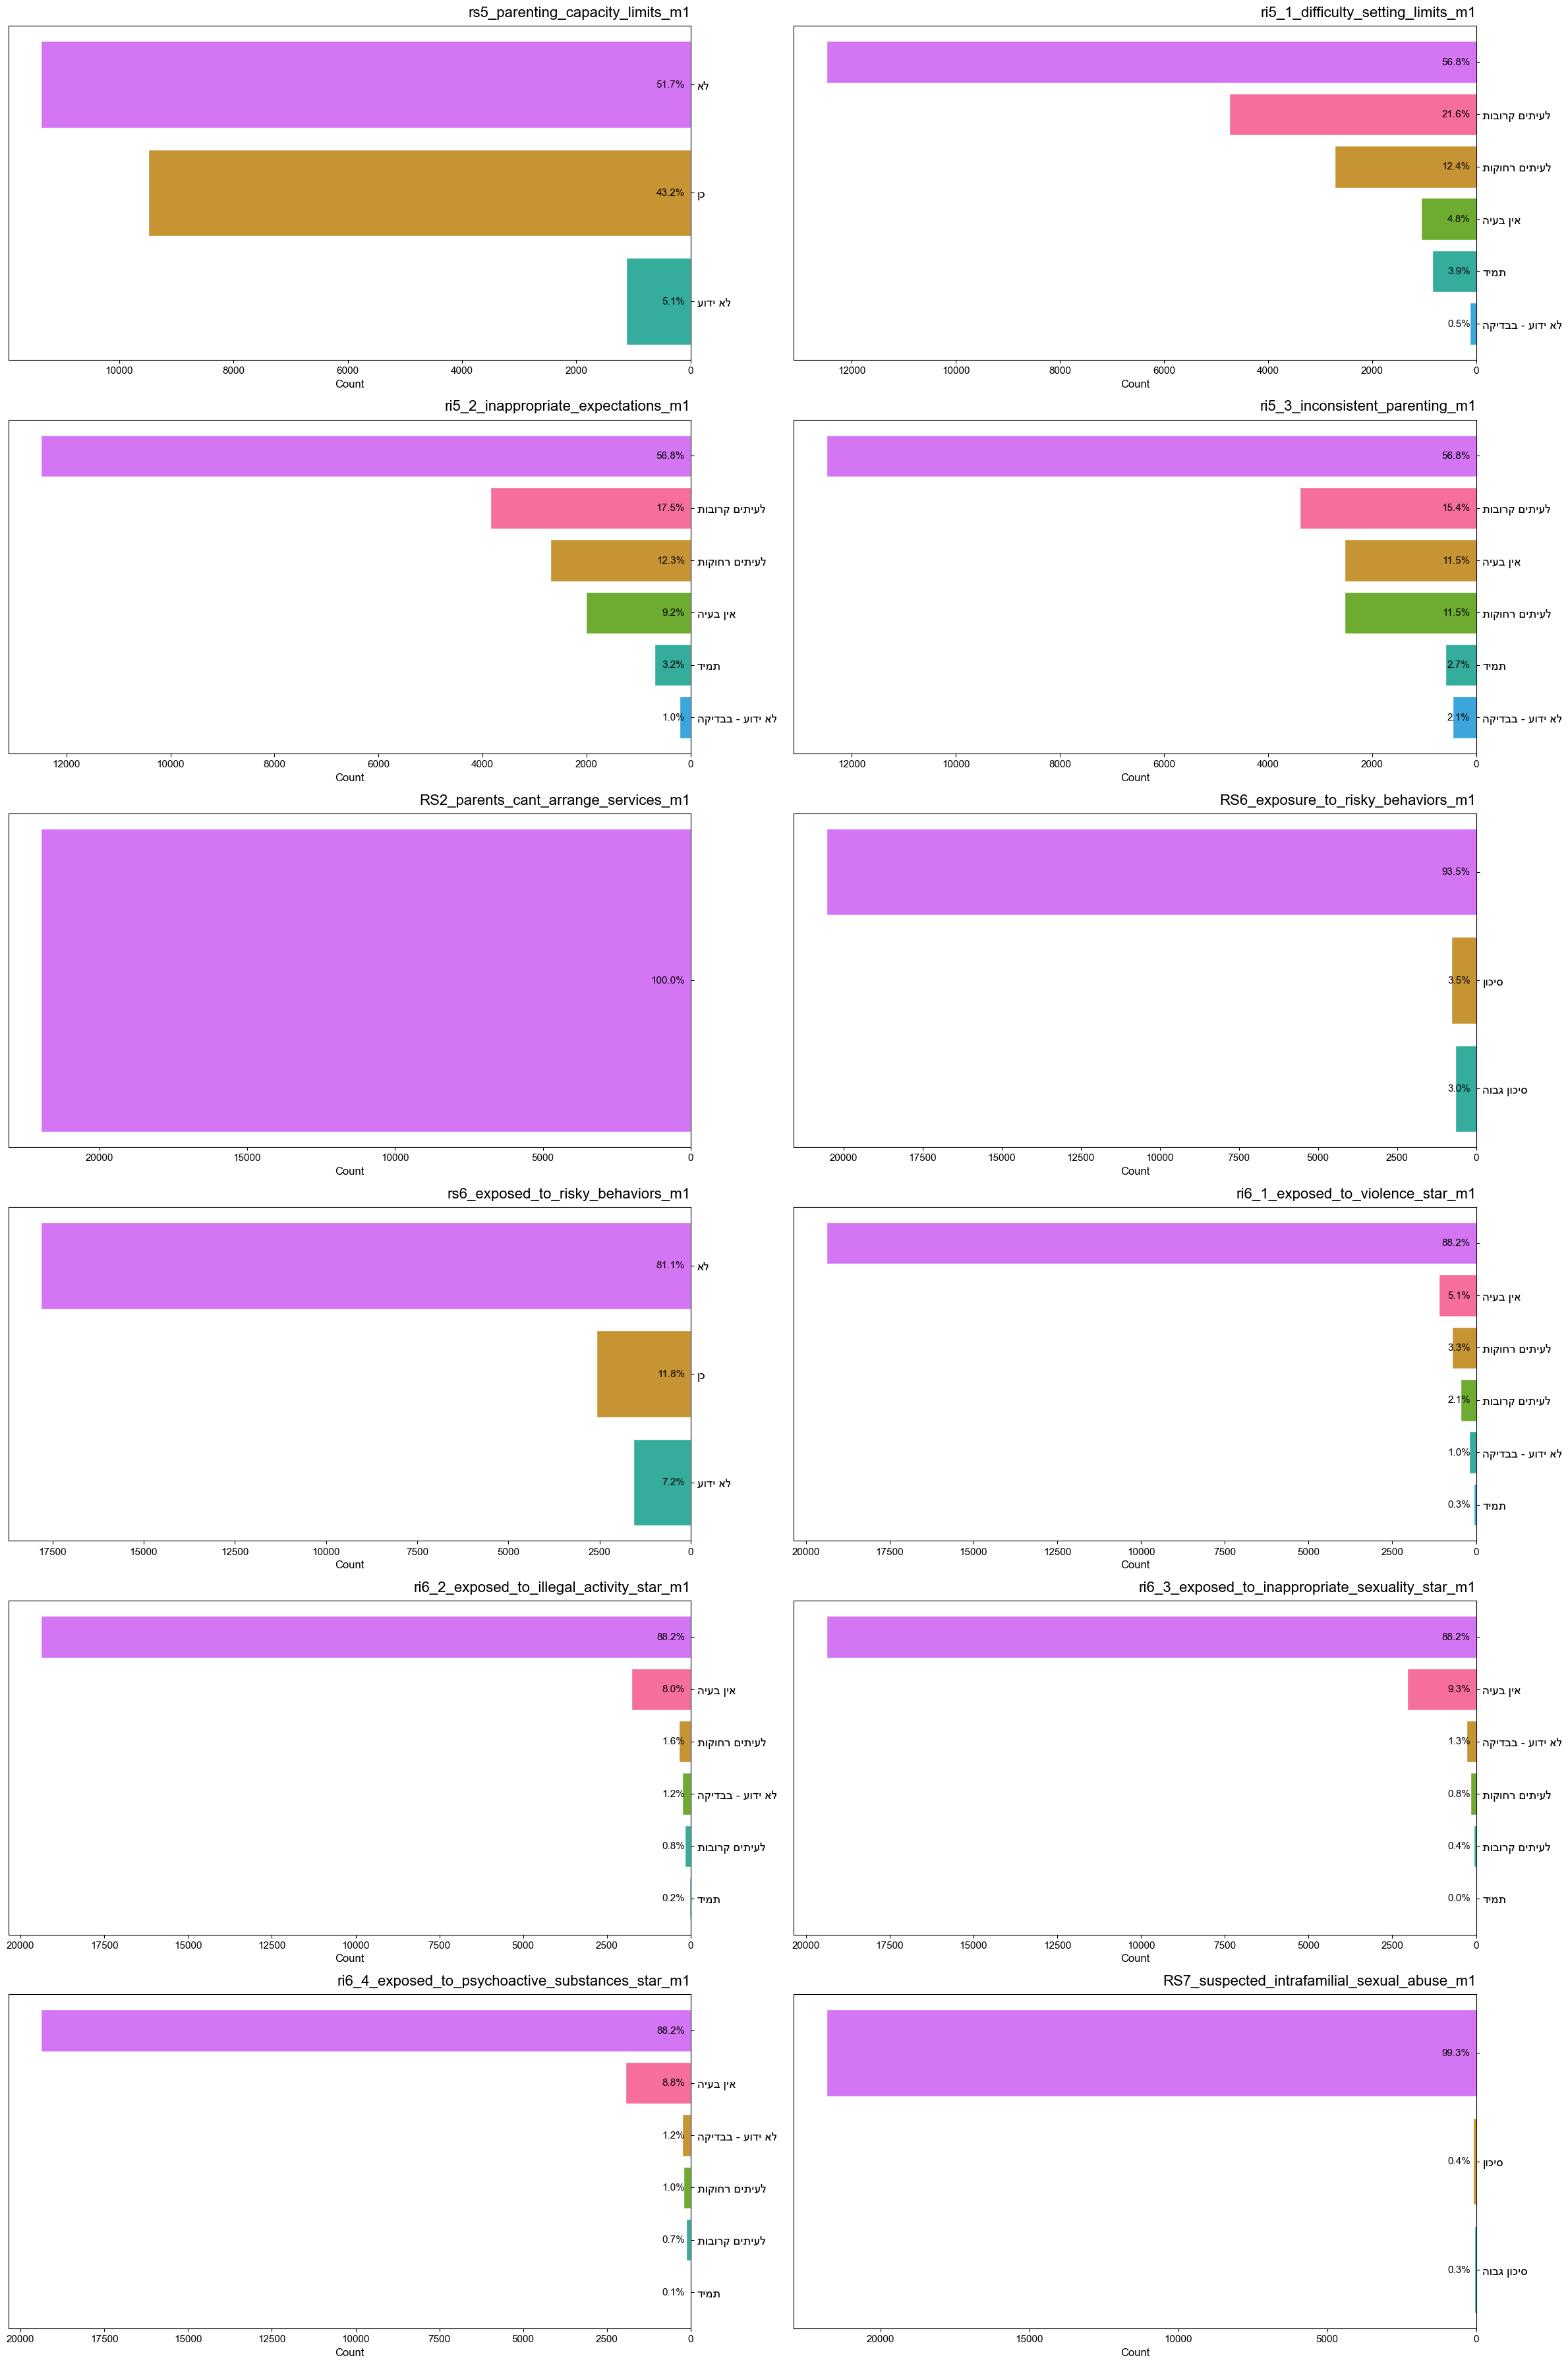

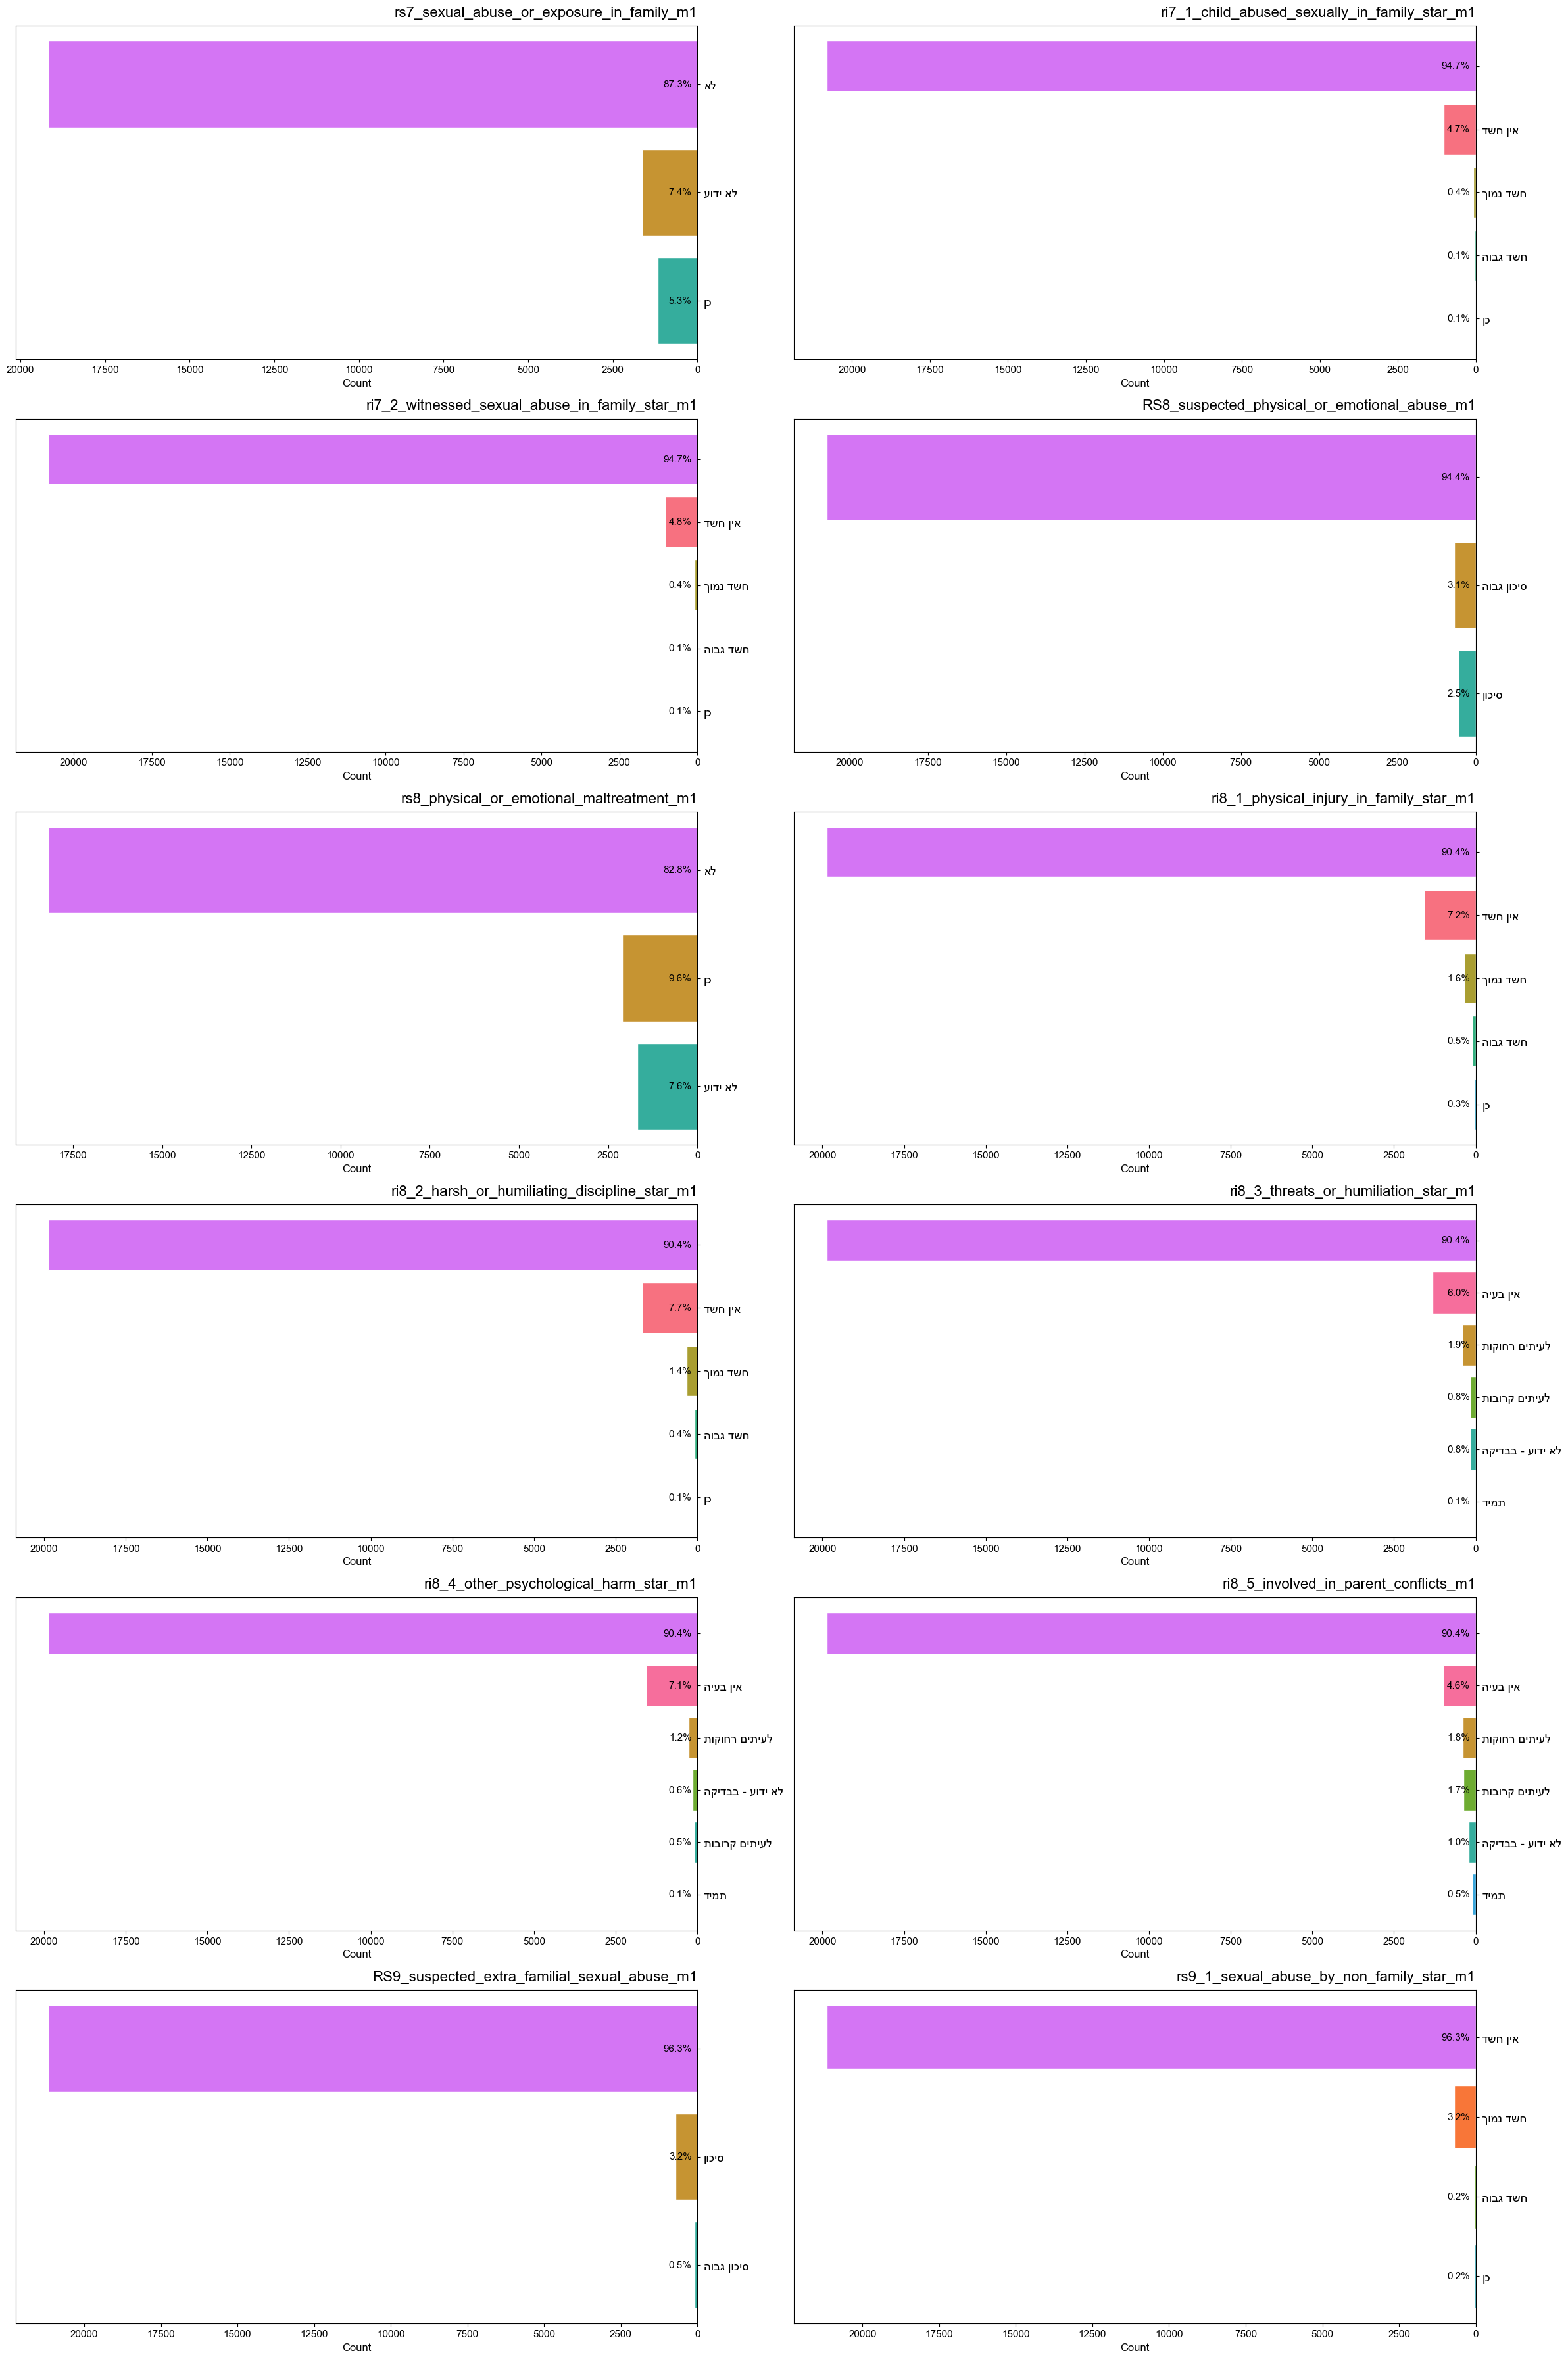

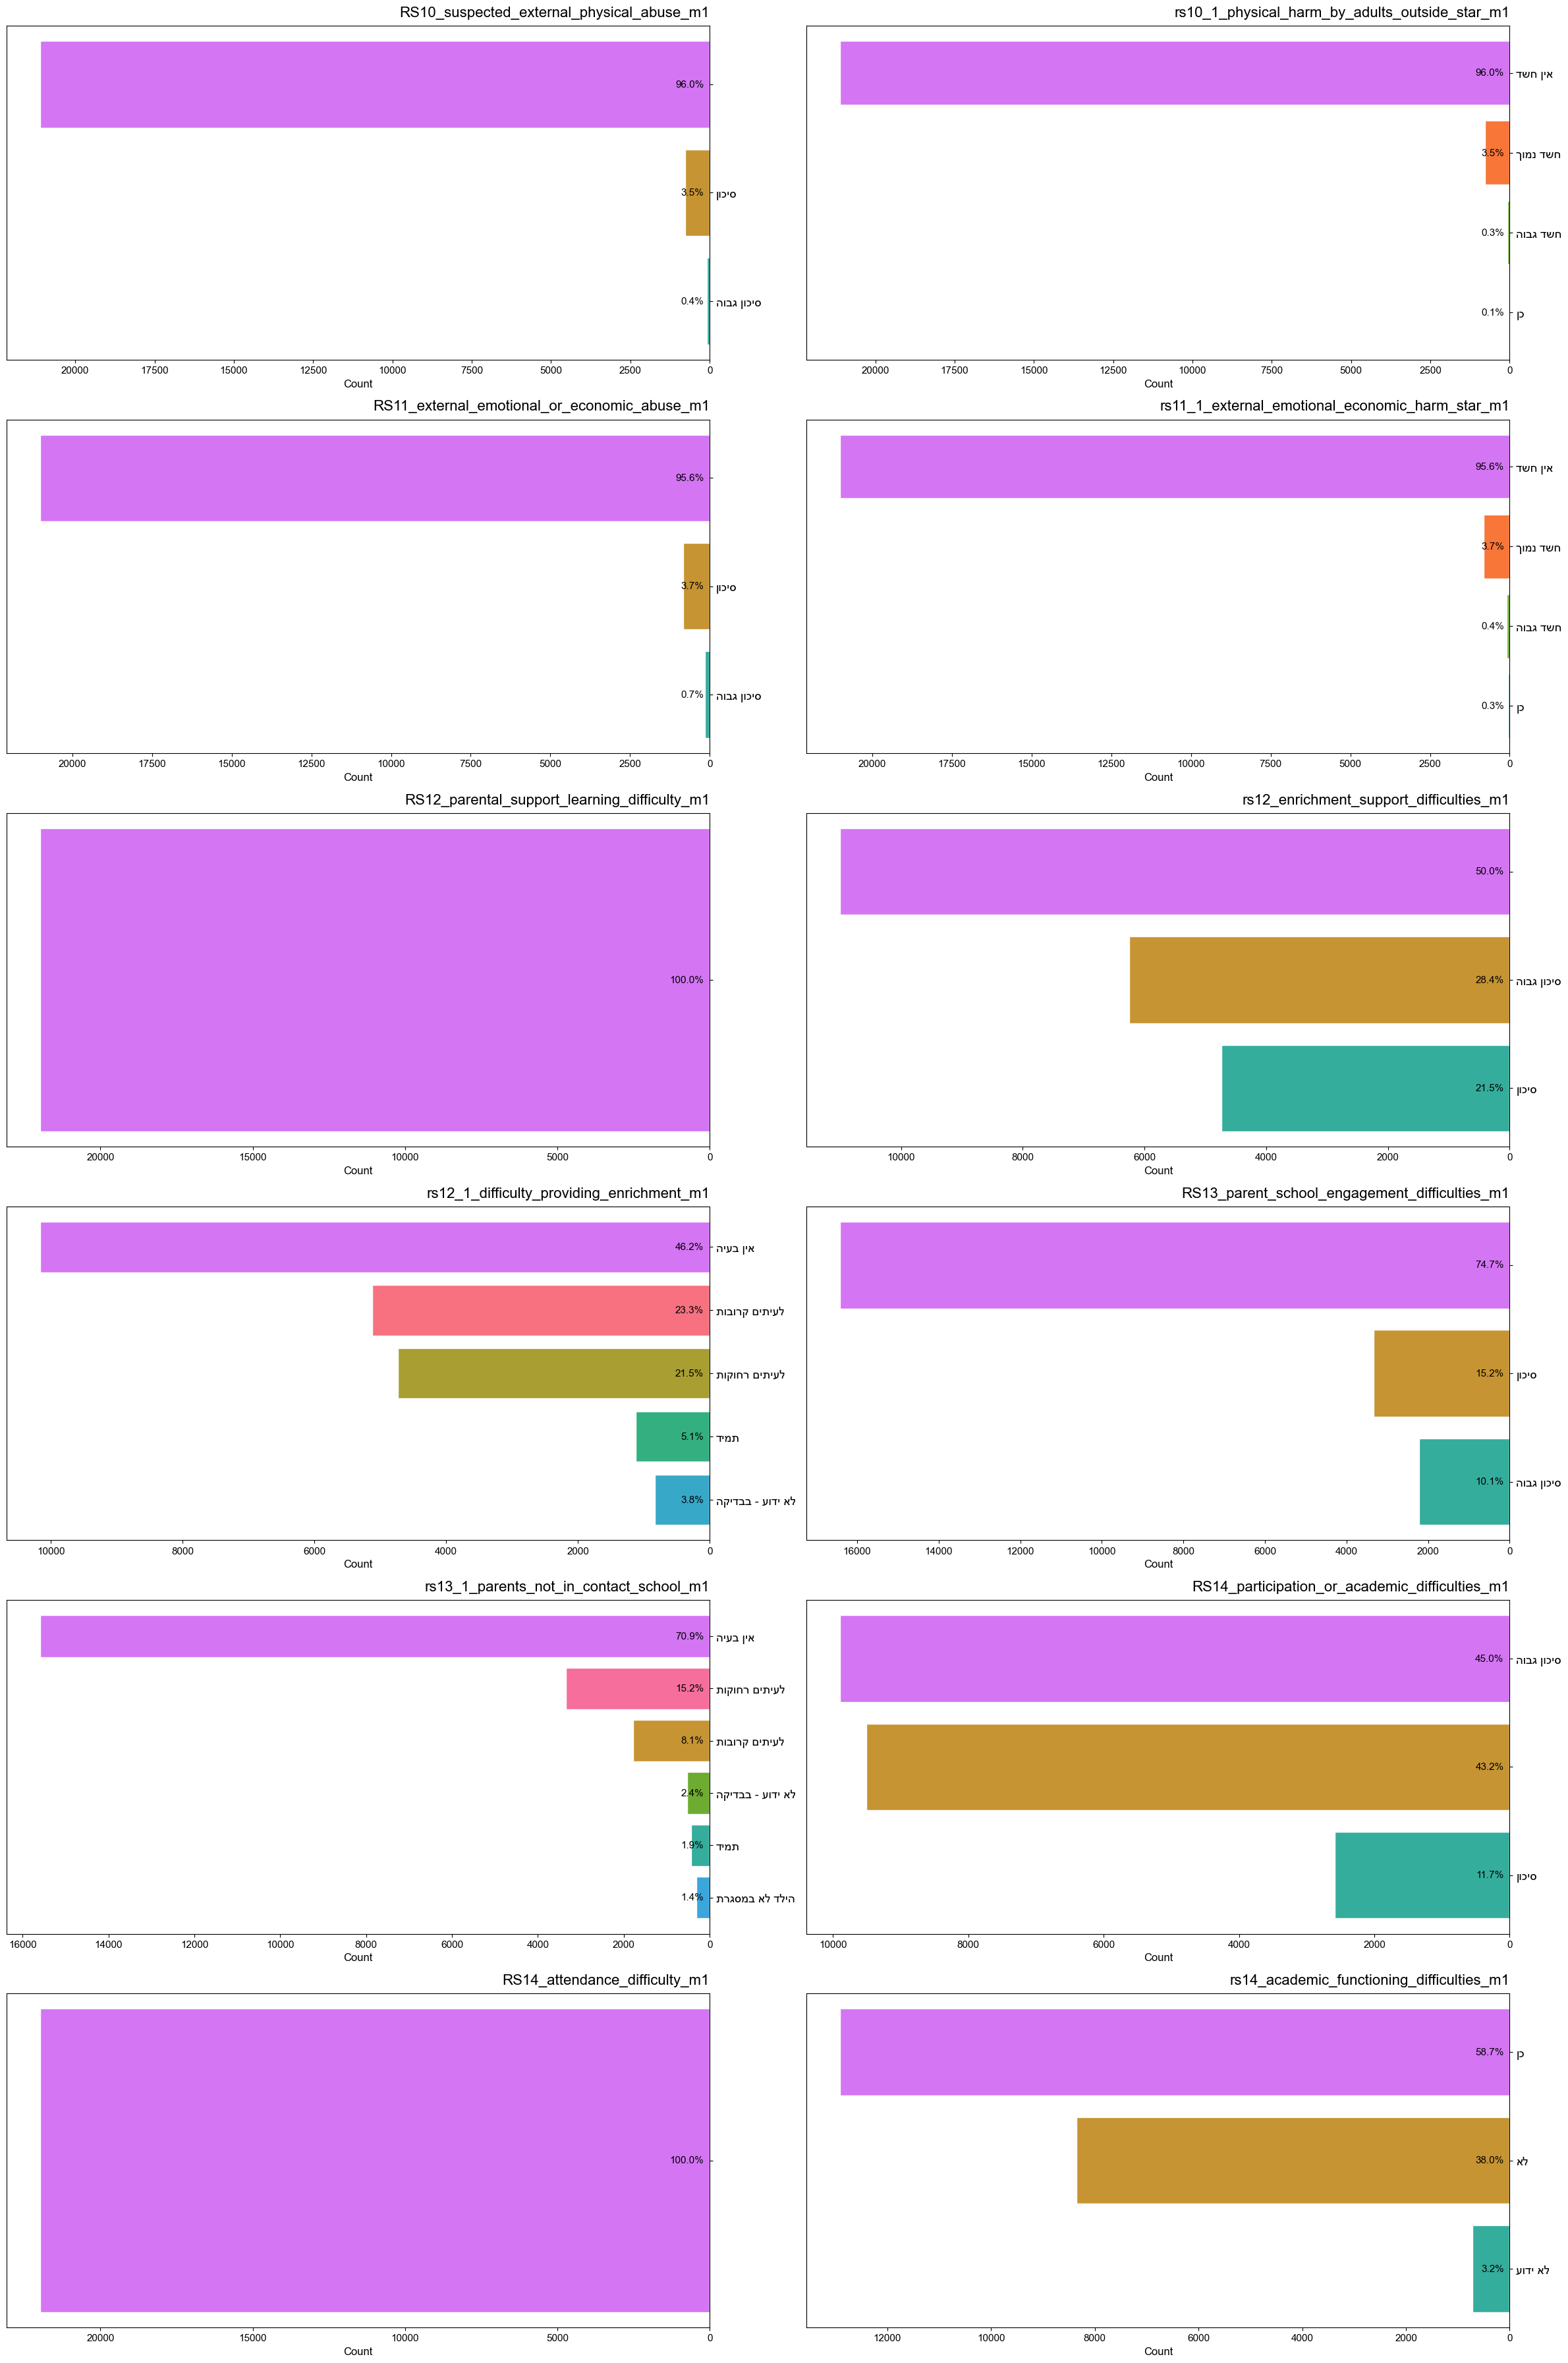

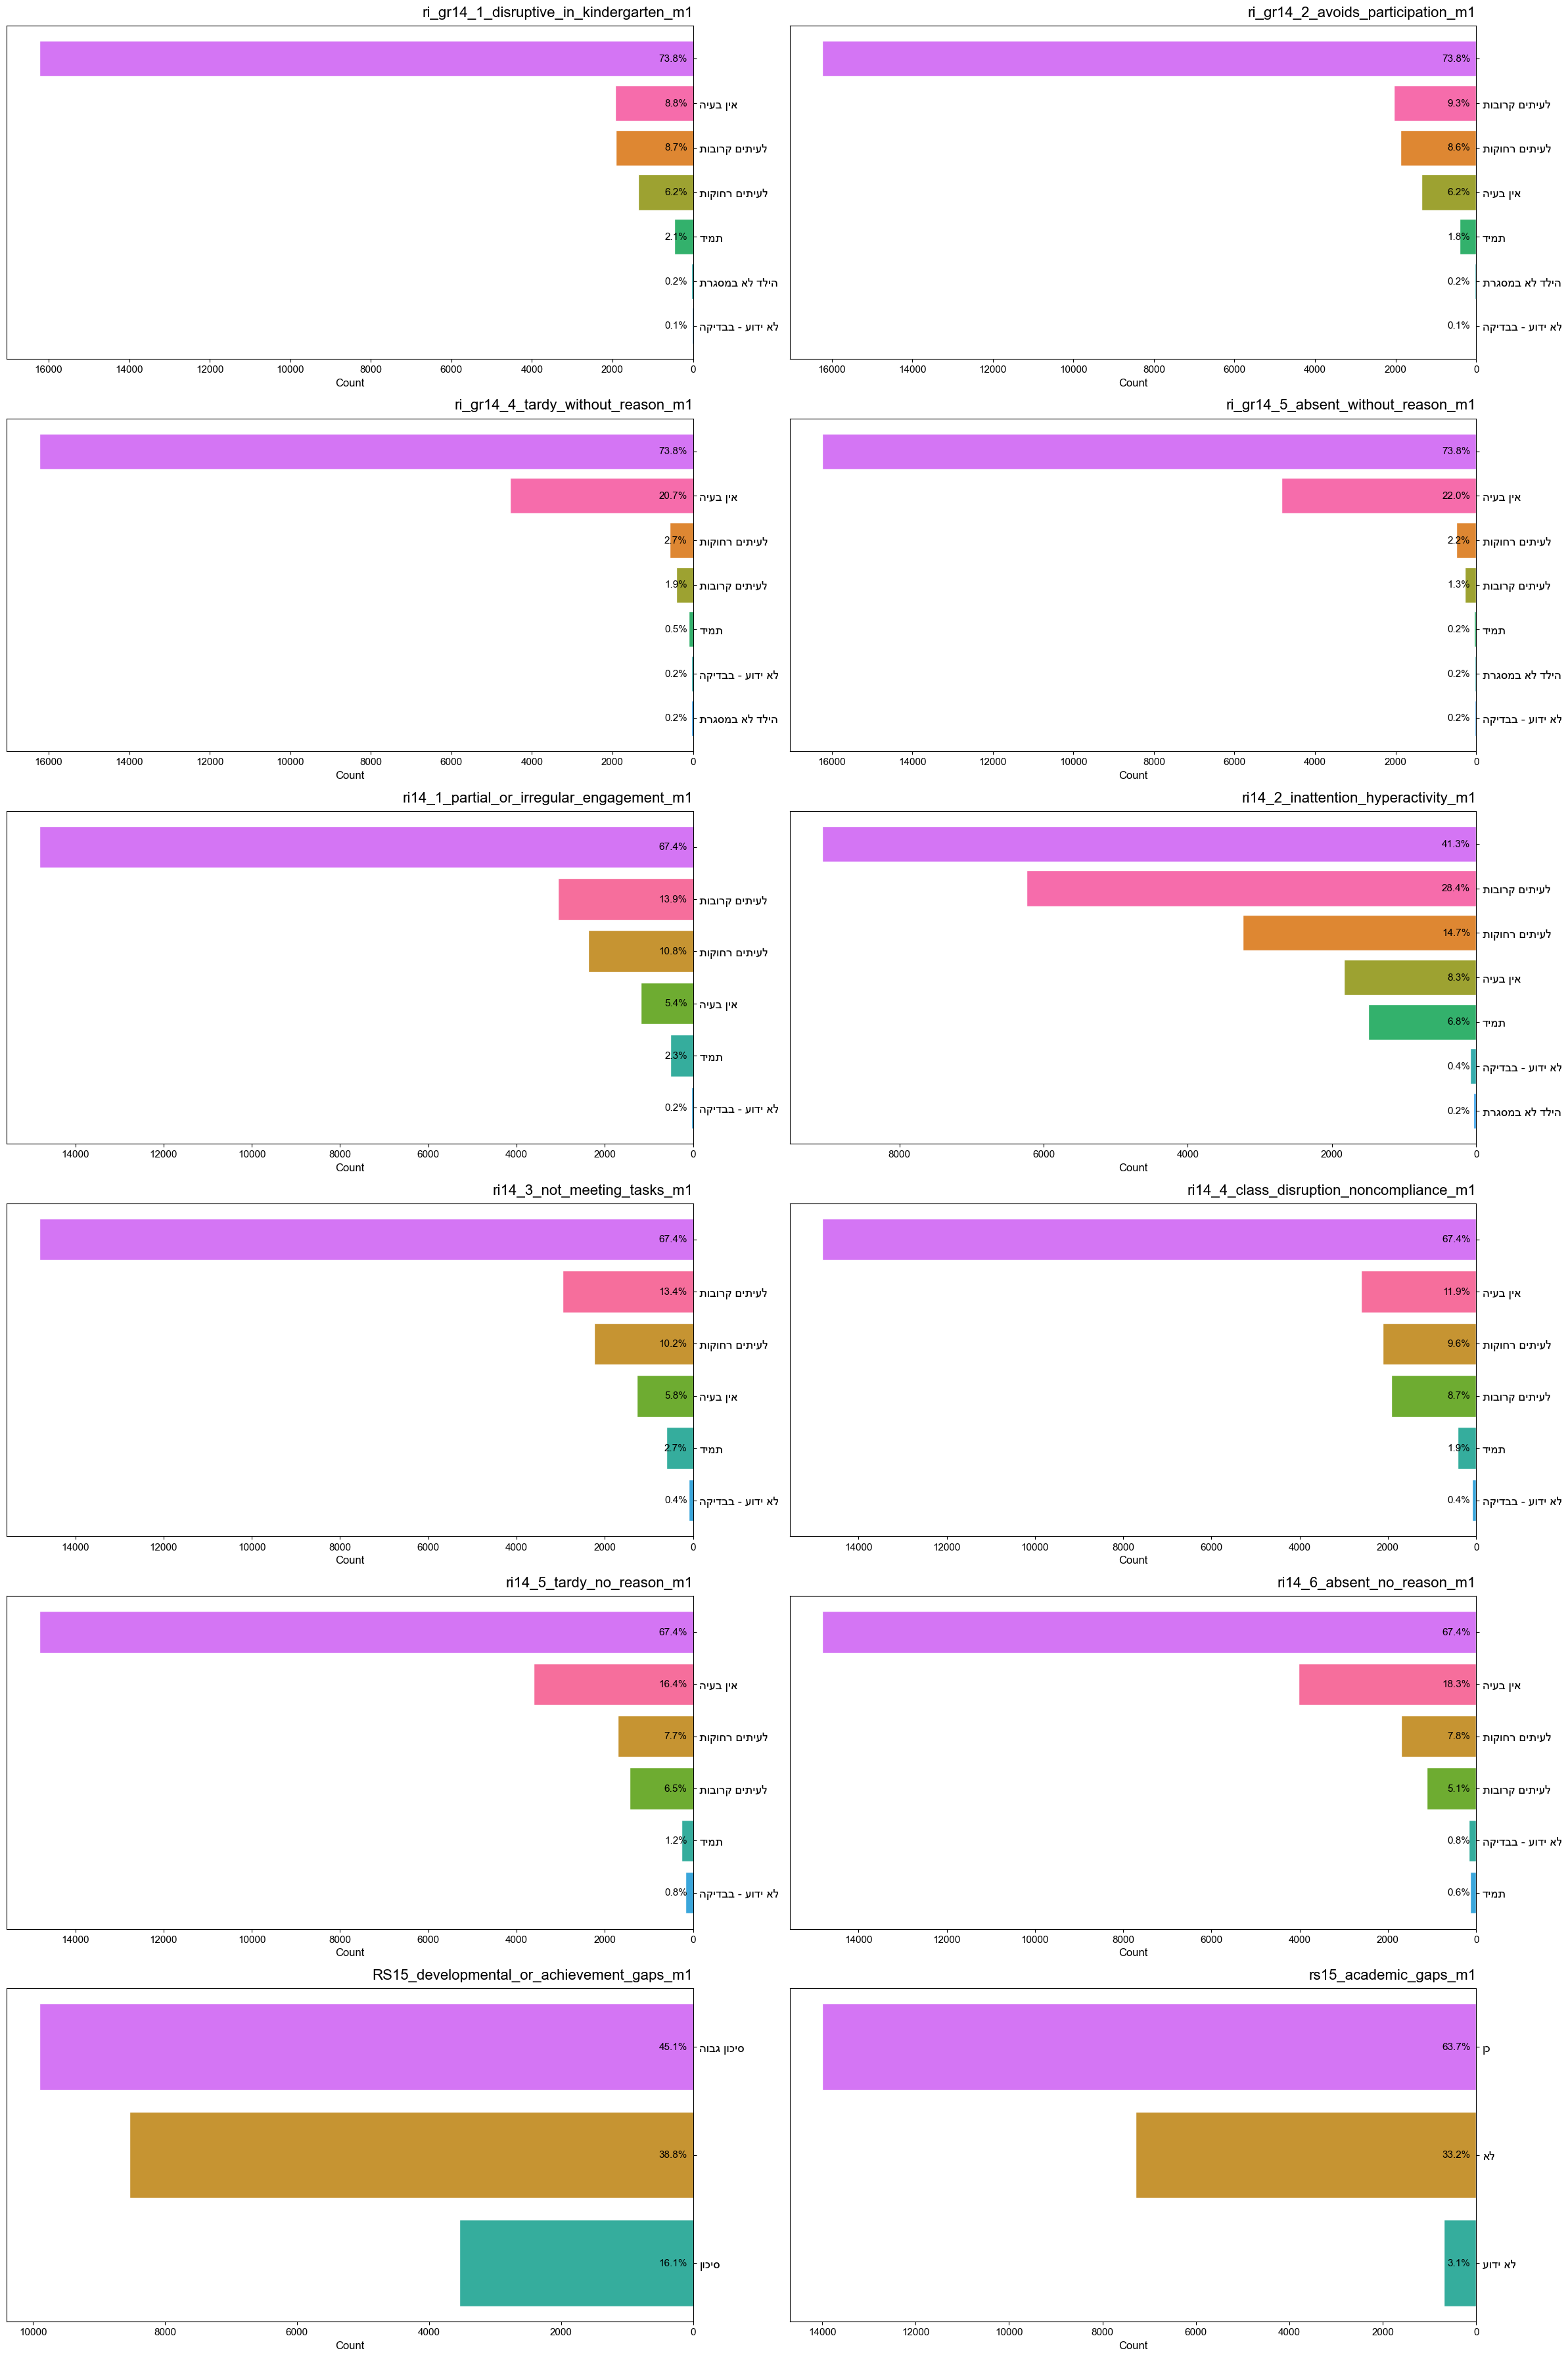

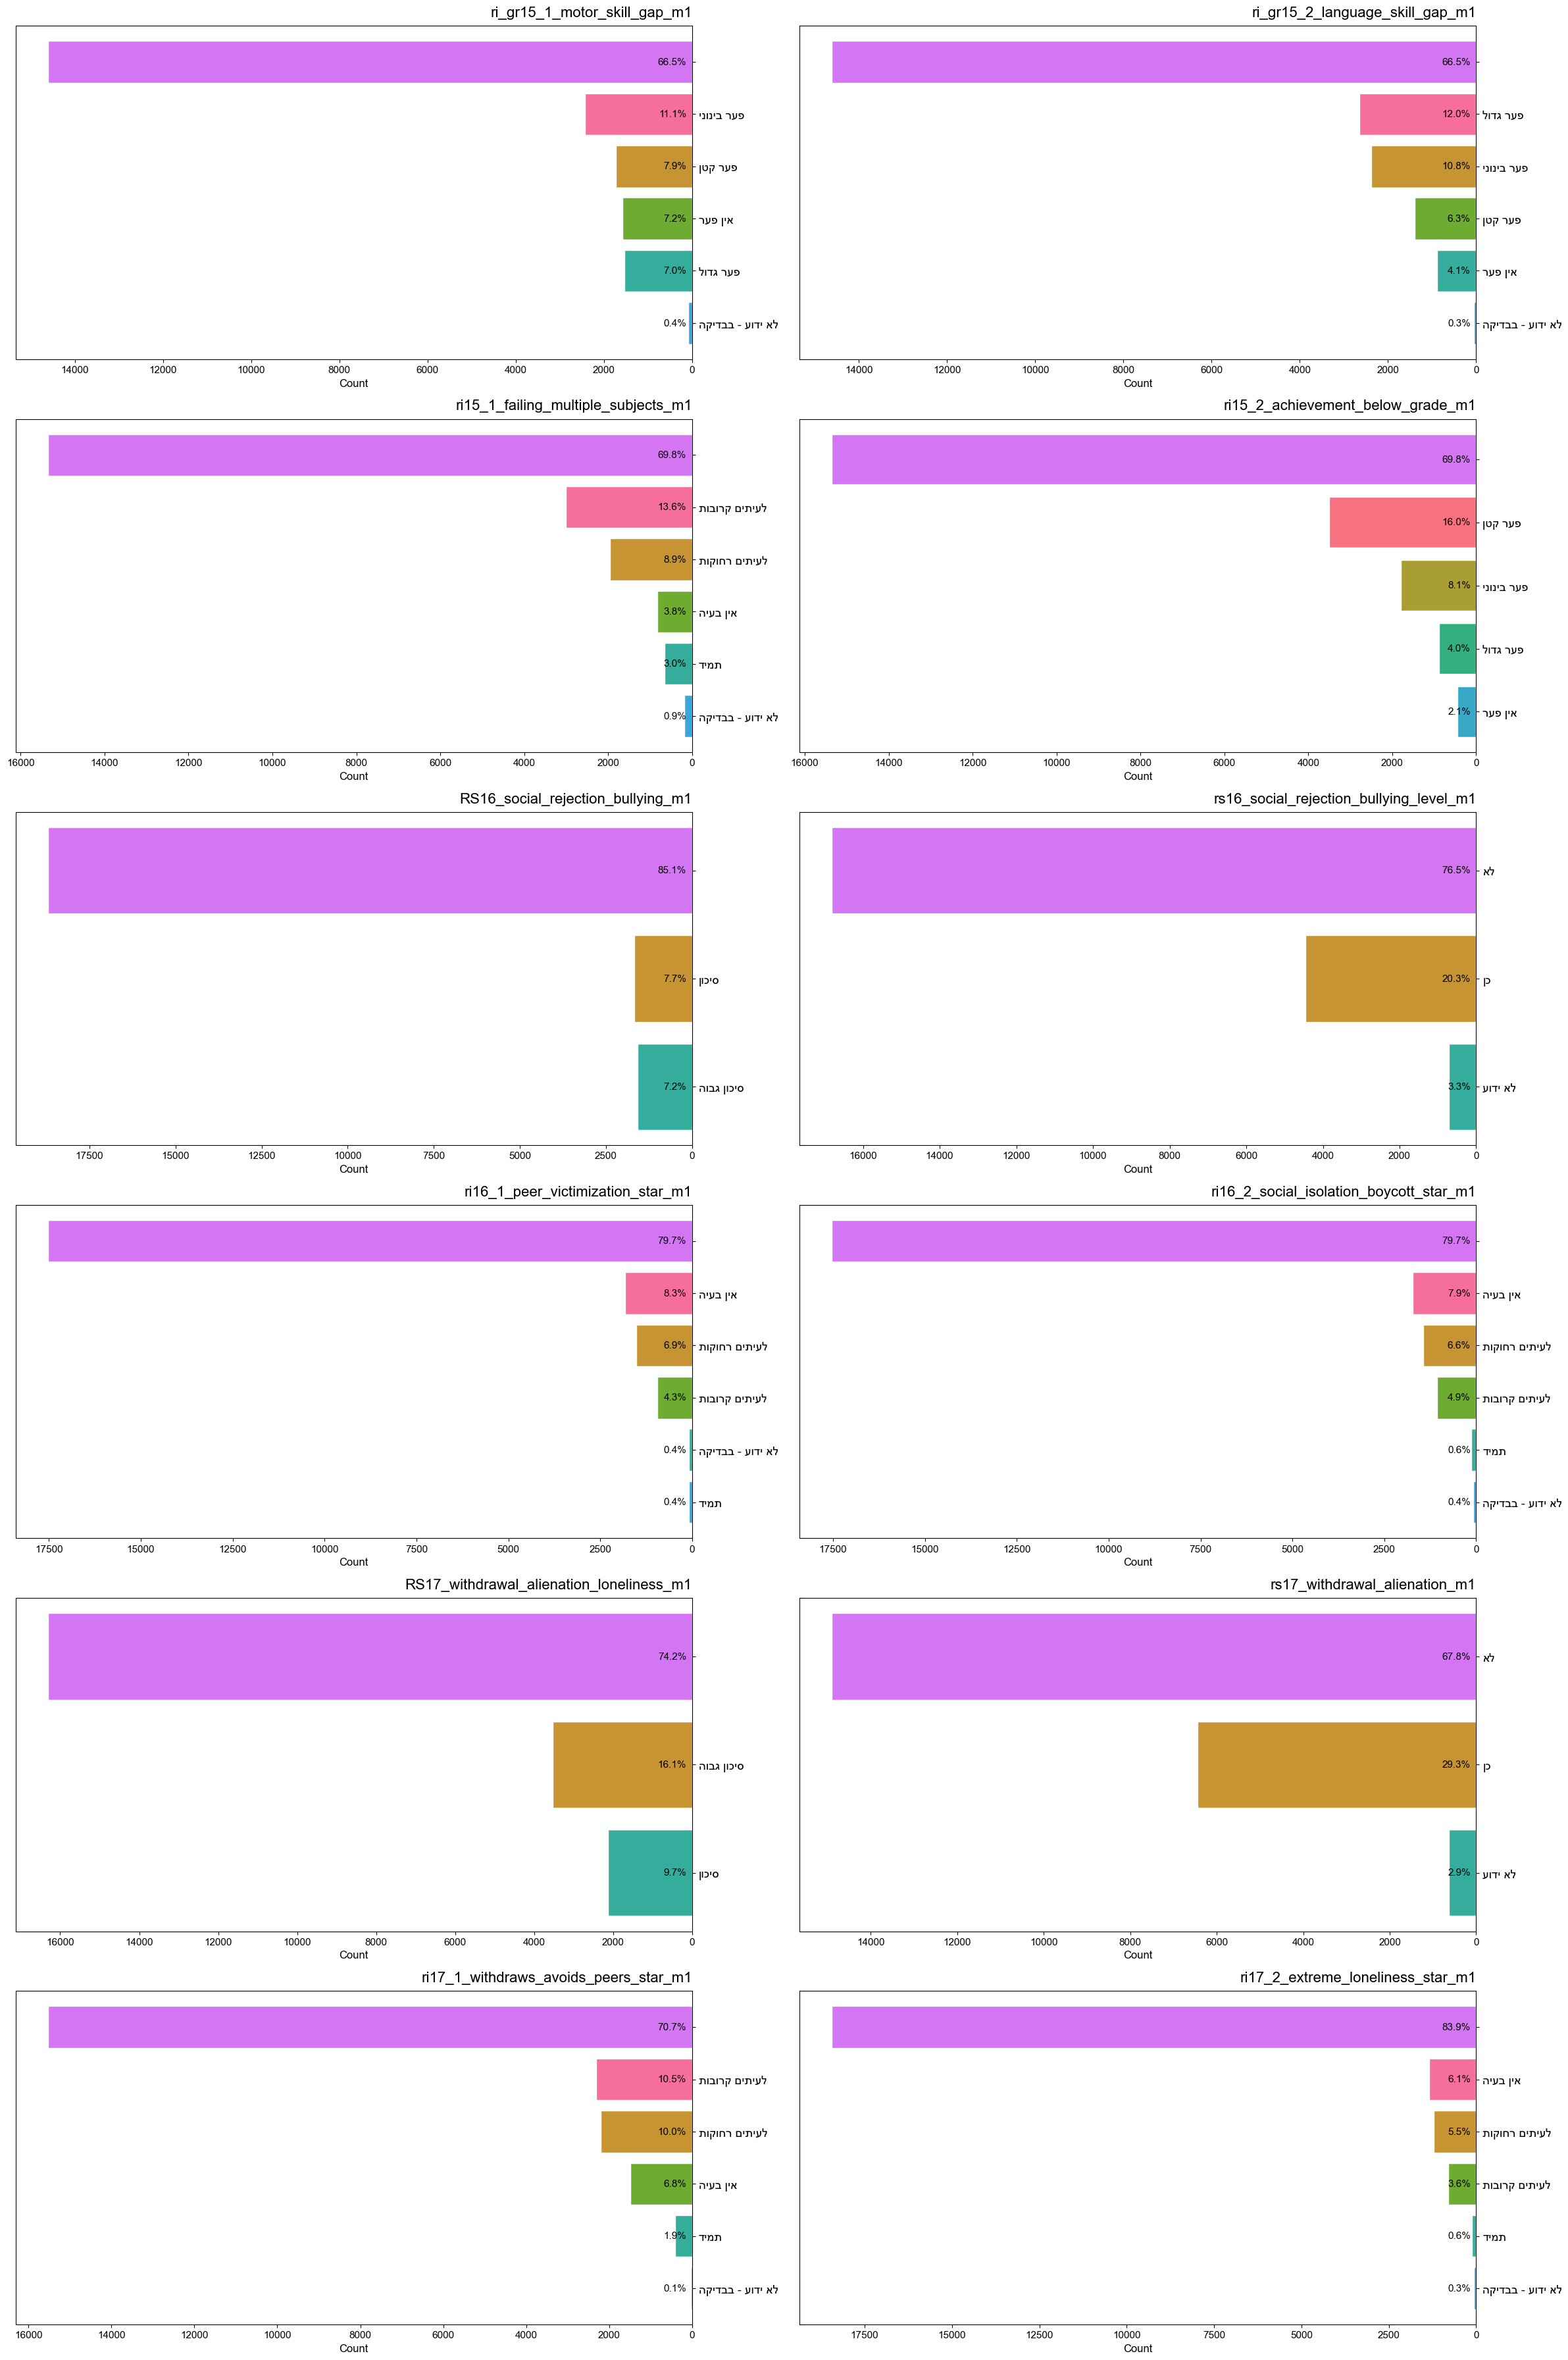

In [ ]:
# Visualizing the distributions of all categorical variables

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
from matplotlib import font_manager

# --- Alias for the DataFrame name: supports df_categorical and df_cat ---
if "df_categorial" not in globals():
    if "df_categorical" in globals():
        df_categorial = df_categorical.copy()
    elif "df_cat" in globals():
        df_categorial = df_cat.copy()
    else:
        raise NameError("df_categorial / df_categorical / df_cat not found in memory.")

# Helper function that reshapes Hebrew text so it is displayed RTL correctly
def heb(s):
    s = str(s) if not pd.isna(s) else ""
    return get_display(arabic_reshaper.reshape(s))

# --- Set a font with Hebrew support ---
available_fonts = set(f.name for f in font_manager.fontManager.ttflist)
if "Arial" in available_fonts:
    plt.rcParams["font.family"] = "Arial"
elif "Noto Sans Hebrew" in available_fonts:
    plt.rcParams["font.family"] = "Noto Sans Hebrew"
else:
    plt.rcParams["font.family"] = "DejaVu Sans"  # Default fallback with basic Hebrew support

plt.rcParams["axes.unicode_minus"] = False

# Base palette settings
H_START = 0.82  
base_n = max(3, len(df_categorial.columns))
palette = sns.husl_palette(base_n, h=H_START)

# --- Split into two groups: few categories vs many categories ---
short_cols = [c for c in df_categorial.columns if df_categorial[c].nunique(dropna=False) <= 20]
long_cols  = [c for c in df_categorial.columns if df_categorial[c].nunique(dropna=False) > 20]
print(f"short_cols: {len(short_cols)} | long_cols: {len(long_cols)}")

# --- Function that adds percentage labels to each bar ---
def annotate_percent(ax, total):
    """Prints percentages at the end of each bar based on relative frequency."""
    for p in ax.patches:
        width = p.get_width()
        pct = 100.0 * width / total if total else 0
        ax.annotate(f"{pct:.1f}%", (p.get_x() + 5, p.get_y() + p.get_height()/2),
                    xytext=(-6, 0), textcoords="offset points",
                    va='center', ha='right', fontsize=11)

# --- Function that plots a horizontal bar chart in RTL style ---
def barh_rtl(ax, series_counts, title):
    """Draws a horizontal bar chart in Hebrew (RTL), with colors and percentage labels."""
    ser = series_counts.sort_values(ascending=False)
    labels = [heb(x) for x in ser.index]
    values = ser.values
    total  = int(ser.sum())

    # Different color for each bar according to number of categories
    palette_local = sns.husl_palette(len(values), h=H_START)

    ax.barh(labels[::-1], values[::-1],
            color=palette_local[::-1], edgecolor="white", linewidth=1)

    # Flip the axis so categories are on the right and numbers on the left
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position("right")
    ax.invert_xaxis()

    # Axis styling
    ax.set_ylabel("") 
    ax.set_xlabel("Count", fontsize=12)
    ax.set_title(heb(title), fontsize=16, loc="right", pad=10)
    ax.tick_params(axis='y', labelsize=13)
    ax.tick_params(axis='x', labelsize=11)

    # Add percentage labels
    annotate_percent(ax, total)

# --- A) Plot variables with up to 20 categories ---
if short_cols:
    ncols = 2
    per_page = 12          # Up to 12 plots per page
    cell_w, cell_h = 12, 6

    for page_start in range(0, len(short_cols), per_page):
        page_cols = short_cols[page_start:page_start+per_page]
        nrows = math.ceil(len(page_cols) / ncols)

        fig = plt.figure(figsize=(ncols*cell_w, nrows*cell_h))
        plt.subplots_adjust(hspace=0.9, wspace=0.8)

        for i, col in enumerate(page_cols, start=1):
            ax = plt.subplot(nrows, ncols, i)
            vc = df_categorial[col].value_counts(dropna=False)
            barh_rtl(ax, vc, col)

        plt.tight_layout(pad=1.2)
        plt.show()
else:
    print("No variables with ≤20 categories.")

# --- B) Plot variables with more than 20 categories ---
if long_cols:
    print("\nVariables with more than 20 categories — showing the 15 most frequent:\n")
    for col in long_cols:
        vc = df_categorial[col].value_counts(dropna=False).head(15)
        fig, ax = plt.subplots(figsize=(12, 6))
        barh_rtl(ax, vc, col)
        plt.tight_layout(pad=1.0)
        plt.show()


## 3) Dummy / Binary Features

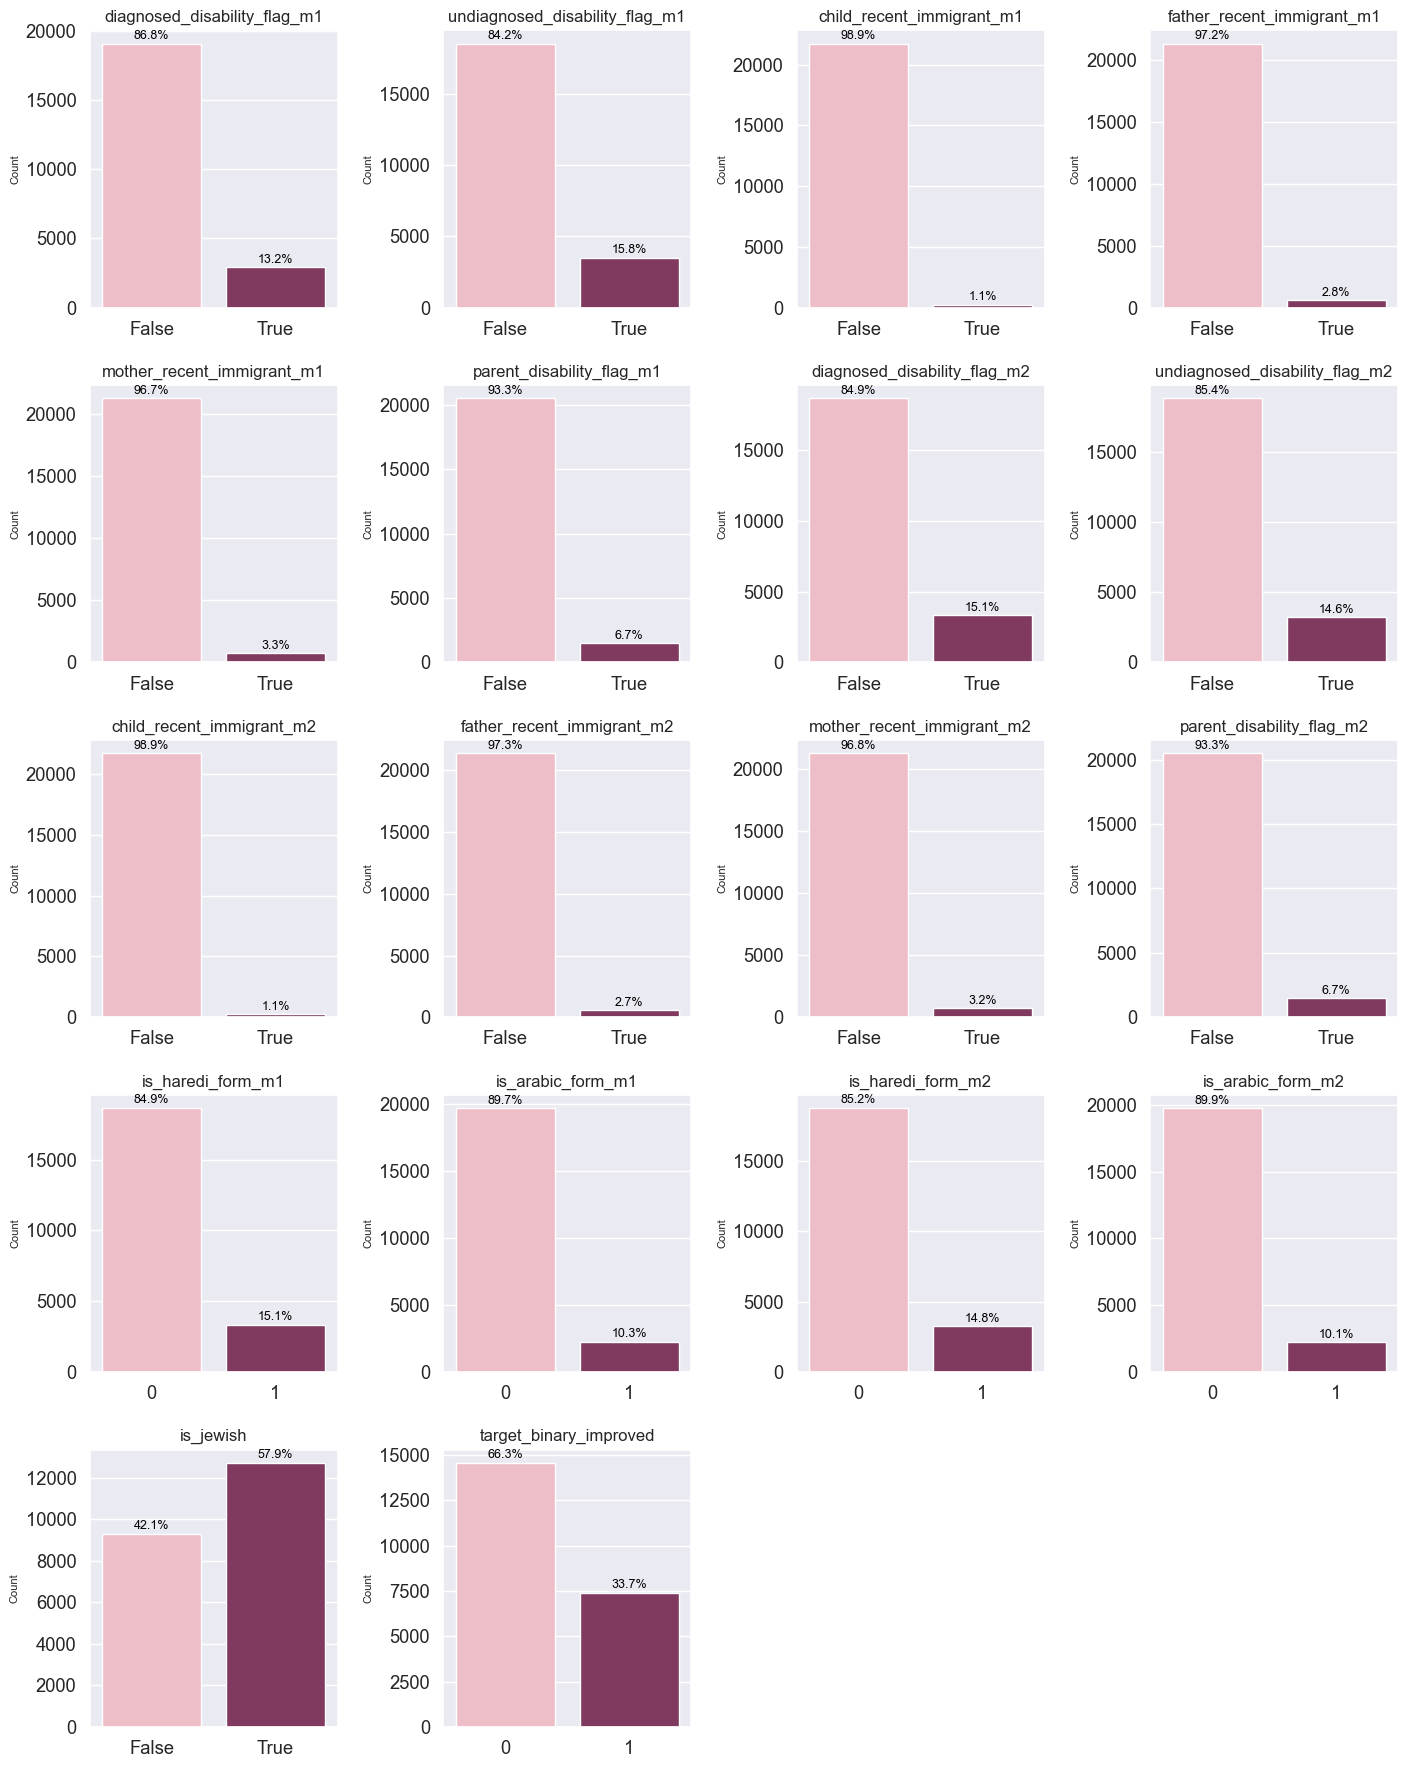

In [70]:
# Visualizing variables created as dummies/flags during data preparation

import matplotlib.pyplot as plt
import seaborn as sns
import math

# --- Basic layout parameters ---
cols = df_dummy.columns
n = len(cols)
ncols = 4
nrows = math.ceil(n / ncols)
cell = 3.6

# --- Plotting the charts ---
fig = plt.figure(figsize=(ncols * cell, nrows * cell))
plt.subplots_adjust(hspace=0.9, wspace=0.6)
sns.set(font_scale=1.2)

for i, col in enumerate(cols, start=1):
    ax = plt.subplot(nrows, ncols, i)
    sns.countplot(x=df_dummy[col], palette=["#F6B6C3", "#8C2E61"], ax=ax)

    # Title and axes
    ax.set_title(col, fontsize=12, pad=6)
    ax.set_xlabel("")
    ax.set_ylabel("Count", fontsize=8)

    # --- Add percentage labels above each bar ---
    total = len(df_dummy[col])
    for p in ax.patches:
        height = p.get_height()
        pct = 100 * height / total if total else 0
        ax.text(
            p.get_x() + p.get_width() / 2,
            height + (total * 0.005),  # slightly above the top of the bar
            f"{pct:.1f}%",
            ha="center", va="bottom", fontsize=9, color="black"
        )

plt.tight_layout(pad=1.3, w_pad=1.3, h_pad=1.3)
plt.show()


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21981 entries, 0 to 21980
Columns: 427 entries, ref_id_360_m1 to target_delta_label
dtypes: Int64(4), bool(13), category(375), datetime64[ns](6), float64(8), int64(21)
memory usage: 15.2 MB


# NEXT TO EDA_Part2